In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

% matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/jordanbauer/Google Drive/Senior Year/Spring Semester/MKT 345/MKT 345 Group Project/CompleteDataset.csv')
df_original = df.copy()
df.head()

Unnamed: 0               Name  Age  \
0           0  Cristiano Ronaldo   32   
1           1           L. Messi   30   
2           2             Neymar   25   
3           3          L. Suárez   30   
4           4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  ...   \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  ...    
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...    
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png  ...    
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...    
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png  ...    

     RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0  61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1  57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2  59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3  64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 75 columns]

In [3]:
premier_clubs = ['Arsenal', 'Brighton & Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 
                 'Huddersfield Town', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United',
                 'Newcastle United', 'Southampton', 'Stoke City', 'Swansea City', 'Tottenham Hotspur',
                 'Watford', 'West Bromwich Albion', 'West Ham United']

Removing a redundant variable.

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

Setting the ID variable to be the unique index.

In [5]:
df.set_index('ID', inplace=True)
df.head()

Name  Age  \
ID                               
20801   Cristiano Ronaldo   32   
158023           L. Messi   30   
190871             Neymar   25   
176580          L. Suárez   30   
167495           M. Neuer   31   

                                                  Photo Nationality  \
ID                                                                    
20801    https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
158023  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
190871  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
176580  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
167495  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                       Flag  Overall  Potential  \
ID                                                                
20801   https://cdn.sofifa.org/flags/38.png       94         94   
158023  https://cdn.sofifa.org/flags/52.png       93         93   
190871  https://cdn.sofifa.org/flags/54.png       92         94   
176580  https://cdn.sofifa.org/flags/60.png       92         92   
167495  https://cdn.sofifa.org/flags/21.png       92         92   

                       Club                                   Club Logo  \
ID                                                                        
20801        Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png   
158023         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   
190871  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   
176580         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   
167495     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png   

         Value  ...     RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB  \
ID              ...                                                          
20801   €95.5M  ...   61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0   
158023   €105M  ...   57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0   
190871   €123M  ...   59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0   
176580    €97M  ...   64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0   
167495    €61M  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

          ST  
ID            
20801   92.0  
158023  88.0  
190871  84.0  
176580  88.0  
167495   NaN  

[5 rows x 73 columns]

Removing unnecessary variables.

In [6]:
df.drop(['Club Logo', 'Flag', 'Photo', 'Special'], axis=1, inplace=True)

Show what variables are missing data.

In [7]:
def show_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count()*100)).sort_values(ascending=False)
    df = pd.concat([total, percent], axis=1, keys=['Count Missing', '% Missing'])
    df = df[df['Count Missing'] > 0]
    return df

In [8]:
show_missing(df)

Count Missing  % Missing
ST             2029  11.284133
LS             2029  11.284133
RWB            2029  11.284133
CAM            2029  11.284133
CB             2029  11.284133
CDM            2029  11.284133
CM             2029  11.284133
LAM            2029  11.284133
LB             2029  11.284133
LCB            2029  11.284133
LCM            2029  11.284133
LDM            2029  11.284133
LF             2029  11.284133
LM             2029  11.284133
CF             2029  11.284133
LW             2029  11.284133
RDM            2029  11.284133
RW             2029  11.284133
LWB            2029  11.284133
RS             2029  11.284133
RF             2029  11.284133
RM             2029  11.284133
RCM            2029  11.284133
RCB            2029  11.284133
RB             2029  11.284133
RAM            2029  11.284133
Club            248   1.379234

Fill in the missing values with "unknown"

In [9]:
df['Club'].fillna('Unknown', inplace=True)

The variables with the  missing data are the ones that describe how players would perform outside their position. We don't care about that. We'll delete these columns.

In [10]:
df.drop(show_missing(df).index,  axis=1, inplace=True)

In [11]:
show_missing(df)

Empty DataFrame
Columns: [Count Missing, % Missing]
Index: []

In [12]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions'],
      dtype='object')

In [13]:
df[df.drop(['Club', 'Nationality', 'Name'], axis=1).columns].dtypes

Age                     int64
Overall                 int64
Potential               int64
Value                  object
Wage                   object
Acceleration           object
Aggression             object
Agility                object
Balance                object
Ball control           object
Composure              object
Crossing               object
Curve                  object
Dribbling              object
Finishing              object
Free kick accuracy     object
GK diving              object
GK handling            object
GK kicking             object
GK positioning         object
GK reflexes            object
Heading accuracy       object
Interceptions          object
Jumping                object
Long passing           object
Long shots             object
Marking                object
Penalties              object
Positioning            object
Reactions              object
Short passing          object
Shot power             object
Sliding tackle         object
Sprint spe

Some of these skill variables have + or - to show how they have changed. We don't want that. We'll remove those signs and keep the first number. We'll also normalize non-standard monetary values, such as 2M instead of 2,000,000.

In [14]:
skills = df.drop(['Club', 'Nationality', 'Name', 'Preferred Positions', 'Age', 'Overall', 'Potential', 'Value', 'Wage'], axis=1).columns

In [15]:
def normalize_skills(data, skill_vars):
    for i in skill_vars:
        data[i] = data[i].astype('str').str.split('+').str.get(0)
        data[i] = data[i].astype('str').str.split('-').str.get(0)
        data[i] = data[i].astype('float64')

def normalize_money(data, money_vars):
    for i in money_vars:
        data[i] = data[i].astype('str').str.split('€').str.get(1)
        data[i] = data[i].where(~data[i].str.endswith('0'), '00')
        base = data[i].str.slice(stop=-1)
        base = base.astype('float')
        multiplier = data[i].str.slice(start=-1)
        multiplier = multiplier.str.replace('K', '1000')
        multiplier = multiplier.str.replace('M', '1000000')
        multiplier = multiplier.astype('int')
        data[i] = base * multiplier

In [16]:
normalize_skills(df, skills)
normalize_money(df, ['Value', 'Wage'])

Remove players with 0 value or wage.

In [17]:
df = df[(df['Value'] != 0.0) & (df['Wage'] != 0.0)]

Set the weekly age variable equal to an annual wage.

In [18]:
df['Wage'] = df['Wage'] * 52

In [19]:
df['Primary position'] = df['Preferred Positions'].str.split(' ').str.get(0)

In [20]:
positions_dict = {
    'F': ['ST', 'RW', 'LW', 'CF'],
    'M': ['CDM', 'RM', 'CM', 'LM', 'CAM'],
    'D': ['LB', 'RB', 'RWB', 'LWB', 'CB'],
    'G': ['GK']
}

types_dict = {
    'O': ['ST', 'RW', 'LW', 'CF', 'CAM'],
    'M': ['RM', 'CM', 'LM'],
    'D': ['LB', 'RB', 'RWB', 'LWB', 'CB', 'CDM'],
    'G': ['GK']
}

In [21]:
def position_refactoring(type_dict, s):
    first_type_s = pd.Series(index=s.index)
    s = s.str.split(' ').str.get(0)
    for i, player in s.iteritems():
        first_type = player.split(' ')[0]
        for key in type_dict.keys():
            if first_type in type_dict[key]:
                first_type_s.loc[i] = key
    return first_type_s

In [22]:
df['Position type'] = position_refactoring(positions_dict, df['Preferred Positions'])
df['Player type'] = position_refactoring(types_dict, df['Preferred Positions'])

In [23]:
pl_df = df[df['Club'].isin(premier_clubs)]

In [24]:
pl_df['Preferred Positions'] = pl_df['Preferred Positions'].str.strip()
pl_df['PP_1'] = pl_df['Preferred Positions'].str.split(' ').str.get(0)
pl_df['PP_2'] = pl_df['Preferred Positions'].str.split(' ').str.get(1)
pl_df['PP_3'] = pl_df['Preferred Positions'].str.split(' ').str.get(2)
pl_df['PP_4'] = pl_df['Preferred Positions'].str.split(' ').str.get(3)
pl_df.fillna('N/A', inplace=True)
pl_df

Name  Age          Nationality  Overall  Potential  \
ID                                                                       
193080            De Gea   26                Spain       90         92   
183277         E. Hazard   26              Belgium       90         91   
192985      K. De Bruyne   26              Belgium       89         92   
192119       T. Courtois   25              Belgium       89         92   
184941        A. Sánchez   28                Chile       89         89   
153079         S. Agüero   29            Argentina       89         89   
176635           M. Özil   28              Germany       88         88   
167948         H. Lloris   30               France       88         88   
41236     Z. Ibrahimović   35               Sweden       88         88   
215914          N. Kanté   26               France       87         90   
195864          P. Pogba   24               France       87         92   
190460        C. Eriksen   25              Denmark       87         91   
168542       David Silva   31                Spain       87         87   
202126           H. Kane   23              England       86         90   
192505         R. Lukaku   24              Belgium       86         90   
189242          Coutinho   25               Brazil       86         89   
184087   T. Alderweireld   28              Belgium       86         87   
179944        David Luiz   30               Brazil       86         86   
179844       Diego Costa   28                Spain       86         86   
162895     Cesc Fàbregas   30                Spain       86         86   
48940            P. Čech   35       Czech Republic       86         86   
193301      A. Lacazette   26               France       85         88   
192883     H. Mkhitaryan   28              Armenia       85         85   
186942       I. Gündoğan   26              Germany       85         87   
184432       Azpilicueta   27                Spain       85         87   
172871     J. Vertonghen   30              Belgium       85         85   
139720        V. Kompany   31              Belgium       85         85   
225508         E. Bailly   23          Ivory Coast       84         89   
218667    Bernardo Silva   22             Portugal       84         91   
211117           D. Alli   21              England       84         90   
...                  ...  ...                  ...      ...        ...   
224951           M. Wood   19              England       56         73   
231639          A. Birch   20              England       56         63   
234559       M. Phillips   19              England       55         71   
235119        F. Bolkiah   19    Brunei Darussalam       55         69   
223909         A. Palmer   20              England       55         65   
228789    Robert Sanchez   19                Spain       55         73   
239321         E. Pierce   18  Republic of Ireland       55         72   
237286       A. Connolly   17  Republic of Ireland       55         72   
229880    A. Wan-Bissaka   19             DR Congo       55         71   
231438        T. Akinola   18              England       54         65   
240676           R. Nabi   18              England       54         64   
233528           K. Metz   19  Republic of Ireland       54         63   
240462        M. Howarth   18              England       54         66   
240732         O. Bayode   18              England       54         64   
231267         J. Lokilo   18             DR Congo       54         72   
221545     M. Waddington   20              England       54         61   
227545           T. Ryan   20  Republic of Ireland       54         69   
234039  R. Edmonds-Green   18              England       53         72   
229206           D. Kane   20  Republic of Ireland       53         70   
229208          R. Booty   19              England       53         63   
231032    Erik Sarmiento   18                Spain       53         72   
237176      R. Schofield

In [25]:
df['Preferred Positions'] = df['Preferred Positions'].str.strip()
df['PP_1'] = df['Preferred Positions'].str.split(' ').str.get(0)
df['PP_2'] = df['Preferred Positions'].str.split(' ').str.get(1)
df['PP_3'] = df['Preferred Positions'].str.split(' ').str.get(2)
df['PP_4'] = df['Preferred Positions'].str.split(' ').str.get(3)
df.fillna('N/A', inplace=True)
df.head()

Name  Age Nationality  Overall  Potential  \
ID                                                               
20801   Cristiano Ronaldo   32    Portugal       94         94   
158023           L. Messi   30   Argentina       93         93   
190871             Neymar   25      Brazil       92         94   
176580          L. Suárez   30     Uruguay       92         92   
167495           M. Neuer   31     Germany       92         92   

                       Club        Value        Wage  Acceleration  \
ID                                                                   
20801        Real Madrid CF   95500000.0  29380000.0          89.0   
158023         FC Barcelona  105000000.0  29380000.0          92.0   
190871  Paris Saint-Germain  123000000.0  14560000.0          94.0   
176580         FC Barcelona   97000000.0  26520000.0          88.0   
167495     FC Bayern Munich   61000000.0  11960000.0          58.0   

        Aggression  ...   Vision  Volleys  Preferred Positions  \
ID                  ...                                          
20801         63.0  ...     85.0     88.0                ST LW   
158023        48.0  ...     90.0     85.0                   RW   
190871        56.0  ...     80.0     83.0                   LW   
176580        78.0  ...     84.0     88.0                   ST   
167495        29.0  ...     70.0     11.0                   GK   

        Primary position  Position type  Player type  PP_1  PP_2  PP_3  PP_4  
ID                                                                            
20801                 ST              F            O    ST    LW   N/A   N/A  
158023                RW              F            O    RW   N/A   N/A   N/A  
190871                LW              F            O    LW   N/A   N/A   N/A  
176580                ST              F            O    ST   N/A   N/A   N/A  
167495                GK              G            G    GK   N/A   N/A   N/A  

[5 rows x 50 columns]

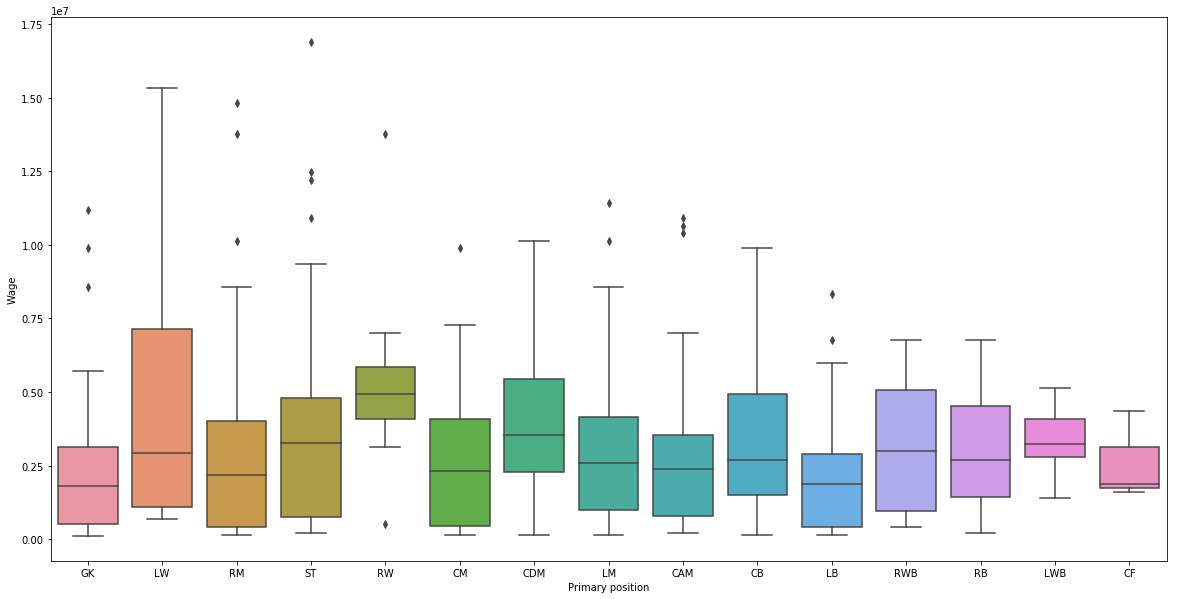

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Wage', x='Primary position', data=df[df['Club'].isin(premier_clubs)])

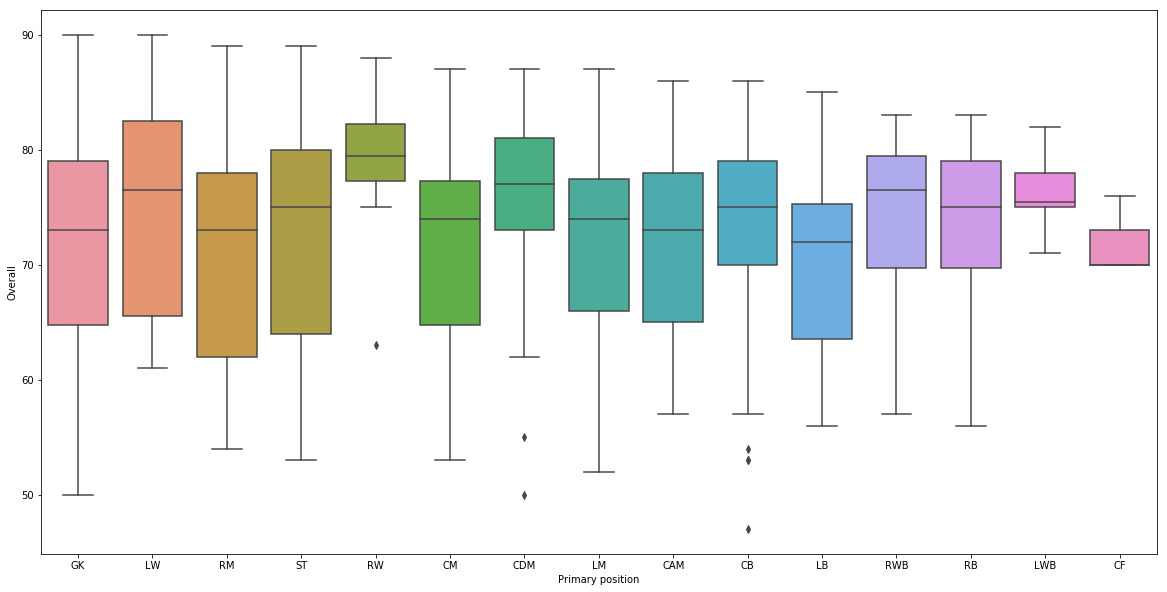

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Overall', x='Primary position', data=df[df['Club'].isin(premier_clubs)])

In [28]:
club_agg_mean = df[df['Club'].isin(premier_clubs)].groupby(by=['Club', 'Primary position']).median()
club_agg_mean.reset_index(inplace=True)
club_agg_mean.drop('Club', axis=1)
club_type_median = club_agg_mean.groupby(by='Primary position').median()['Overall'].reset_index()

club_agg_payroll = df[df['Club'].isin(premier_clubs)].groupby(by=['Club', 'Primary position']).sum()
club_agg_payroll.reset_index(inplace=True)
club_agg_payroll.drop('Club', axis=1)
club_agg_payroll = club_agg_payroll.groupby(by='Primary position').median()['Wage'].reset_index()

club_agg_count = df[df['Club'].isin(premier_clubs)].groupby(by=['Club', 'Primary position']).count()
club_agg_count.reset_index(inplace=True)
club_agg_count.drop('Club', axis=1)
club_type_count = club_agg_count.groupby(by='Primary position').mean()['Player type'].reset_index()

In [29]:
df[df['Club'].isin(premier_clubs)].groupby(by=['Club']).sum()['Wage'].sort_values(ascending=False)

Club
Manchester United         189956000.0
Chelsea                   183924000.0
Manchester City           163904000.0
Arsenal                   156364000.0
Liverpool                 138528000.0
Everton                   129948000.0
Tottenham Hotspur         113308000.0
West Ham United           100620000.0
Southampton                87828000.0
Leicester City             73996000.0
Stoke City                 71916000.0
Swansea City               71604000.0
Newcastle United           68796000.0
Watford                    66716000.0
West Bromwich Albion       65104000.0
Crystal Palace             60840000.0
Burnley                    54080000.0
Brighton & Hove Albion     52832000.0
Huddersfield Town          39936000.0
Name: Wage, dtype: float64

In [30]:
def transpose_percents(data_1, data_2, columns, index):
    temp_df = pd.DataFrame(columns=columns)
    for row in data_2.index:
        temp = (data_1.loc[row] / data_2.loc[row]).to_frame().T.round(4)
        temp_df = pd.concat([temp_df, temp], axis=0)
    temp_df.reset_index(inplace=True, drop=True)
    temp_df['Club'] = index
    temp_df.set_index('Club', inplace=True)
    temp_df.fillna(0, inplace=True)
    return temp_df

def transpose_counts(data, columns, index):
    temp_df = pd.DataFrame(columns=columns)
    for row in index:
        temp = data.loc[row].to_frame().T
        temp_df = pd.concat([temp_df, temp], axis=0)
    temp_df.reset_index(inplace=True, drop=True)
    temp_df['Club'] = index
    temp_df.set_index('Club', inplace=True)
    temp_df.fillna(0, inplace=True)
    return temp_df

In [31]:
club_position_counts = transpose_counts(df[df['Club'].isin(premier_clubs)].groupby(by=['Club', 'Primary position']).count()['Wage'],
                                        df['Primary position'].unique(), premier_clubs)
club_position_counts

CAM  CB  CDM  CF  CM  GK  LB  LM  LW  LWB  RB  RM  RW  \
Club                                                                            
Arsenal                   1   6    5   0   3   2   0   2   0    0   4   3   1   
Brighton & Hove Albion    2   4    1   2   4   4   2   4   1    1   1   3   0   
Burnley                   3   3    2   0   5   4   4   0   0    0   2   4   0   
Chelsea                   4   4    1   0   5   4   3   3   2    0   2   2   0   
Crystal Palace            3   4    3   0   3   2   4   5   0    1   2   3   0   
Everton                   4   6    0   0   4   3   2   4   1    0   1   1   1   
Huddersfield Town         3   7    0   0   4   5   3   4   0    0   1   2   0   
Leicester City            1   3    0   0   5   4   3   4   0    0   3   2   0   
Liverpool                 6   3    1   1   5   4   3   0   2    1   1   0   1   
Manchester City           1   7    2   0   3   3   1   3   3    1   3   2   0   
Manchester United         0   5    5   0   2   3   4   2   0    0   2   3   3   
Newcastle United          1   4    3   0   5   3   7   3   0    0   1   2   0   
Southampton               3   7    3   0   1   3   4   2   0    0   3   2   0   
Stoke City                2   4    2   0   6   4   1   0   0    1   3   3   1   
Swansea City              1   5    3   0   6   4   2   1   2    0   3   1   1   
Tottenham Hotspur         3   5    1   0   2   5   3   5   0    2   1   0   0   
Watford                   2   6    2   0   4   3   2   3   0    1   2   1   0   
West Bromwich Albion      1   5    3   0   3   5   4   3   0    0   1   0   0   
West Ham United           4   7    0   0   2   3   0   3   1    2   2   3   0   

                        RWB  ST  
Club                             
Arsenal                   0   6  
Brighton & Hove Albion    0   4  
Burnley                   0   5  
Chelsea                   0   3  
Crystal Palace            0   3  
Everton                   1   5  
Huddersfield Town         1   3  
Leicester City            0   7  
Liverpool                 1   3  
Manchester City           1   3  
Manchester United         0   5  
Newcastle United          1   3  
Southampton               0   5  
Stoke City                1   5  
Swansea City              0   3  
Tottenham Hotspur         1   4  
Watford                   1   5  
West Bromwich Albion      0   4  
West Ham United           2   3

In [32]:
club_position_counts.sum(axis=1)

Club
Arsenal                   33
Brighton & Hove Albion    33
Burnley                   32
Chelsea                   33
Crystal Palace            33
Everton                   33
Huddersfield Town         33
Leicester City            32
Liverpool                 32
Manchester City           33
Manchester United         34
Newcastle United          33
Southampton               33
Stoke City                33
Swansea City              32
Tottenham Hotspur         32
Watford                   32
West Bromwich Albion      29
West Ham United           32
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

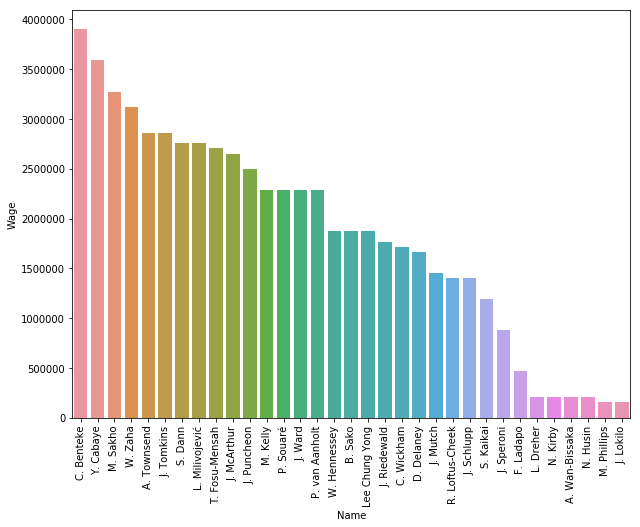

In [33]:
plt.figure(figsize=(10,7.5))
sns.barplot(x='Name', y='Wage', data=df[df['Club'] == 'Crystal Palace'].sort_values(by='Wage', ascending=False))
plt.xticks(rotation='vertical')

In [34]:
df[df['Club'].isin(premier_clubs)].groupby('Club').median()['Overall'].sort_values(ascending=False)

Club
Arsenal                   80.0
Manchester United         80.0
Chelsea                   79.0
Liverpool                 78.0
Manchester City           78.0
Tottenham Hotspur         78.0
Everton                   77.0
West Ham United           75.5
Southampton               75.0
West Bromwich Albion      75.0
Leicester City            75.0
Watford                   75.0
Stoke City                74.0
Newcastle United          73.0
Swansea City              73.0
Crystal Palace            73.0
Burnley                   72.5
Brighton & Hove Albion    71.0
Huddersfield Town         70.0
Name: Overall, dtype: float64

In [35]:
cp_starter_budget = df[df['Club'] == 'Crystal Palace'].sort_values(by='Wage', ascending=False)[:11]['Wage'].sum()
cp_sub_budget = df[df['Club'] == 'Crystal Palace'].sort_values(by='Wage', ascending=False)[11:18]['Wage'].sum()
cp_reserve_budget = df[df['Club'] == 'Crystal Palace'].sort_values(by='Wage', ascending=False)[18:]['Wage'].sum()

In [36]:
def payroll_props(data, club_var, wage_var, props):
    temp_starters = []
    temp_subs = []
    temp_reserve = []
    clubs = data[club_var].unique()
    for club in clubs:
        temp_starters.append(data[data[club_var] == club].sort_values(by=wage_var, 
                                                                  ascending=False)[:props[0]][wage_var].sum())
        temp_subs.append(data[data[club_var] == club].sort_values(by=wage_var, 
                                                                  ascending=False)[props[0]:props[0]+props[1]][wage_var].sum())
        temp_reserve.append(data[data[club_var] == club].sort_values(by=wage_var, 
                                                                  ascending=False)[props[0]+props[1]:][wage_var].sum())
    return pd.DataFrame({'Club': clubs, 'Starters Payroll': temp_starters, 'Subs Payroll': temp_subs, 'Reserve Payroll': temp_reserve})




In [37]:
payrolls_2 = payroll_props(df[df['Club'].isin(premier_clubs)], 'Club', 'Wage', [11, 7])
payrolls_1 = df[df['Club'].isin(premier_clubs)].groupby('Club', 
                                           as_index=False).sum()[['Wage', 'Club']].sort_values(by='Wage', 
                                                                                               ascending=False)
overalls = df[df['Club'].isin(premier_clubs)].groupby('Club', 
                                           as_index=False).mean()[['Club', 'Overall']].sort_values(by='Overall', 
                                                                                               ascending=False)
budgets = payrolls_2.merge(payrolls_1, how='inner', on='Club')
budgets = budgets.merge(overalls, how='inner', on='Club')
budgets.rename({'Wage': 'Total Budget', 'Overall': 'Mean Overall'}, axis=1, inplace=True)
budgets['Bgt % Starters'] = budgets['Starters Payroll'] / budgets['Total Budget']
budgets['Starters Mean Wage'] = budgets['Starters Payroll'] / 11
budgets['Bgt % Reserve'] = budgets['Reserve Payroll'] / budgets['Total Budget']
budgets['Bgt % Subs'] = budgets['Subs Payroll'] / budgets['Total Budget']
budgets['Subs Mean Wage'] = budgets['Subs Payroll'] / 7
budgets

Club  Reserve Payroll  Starters Payroll  Subs Payroll  \
0        Manchester United       43056000.0       104000000.0    42900000.0   
1                  Chelsea       28184000.0       114400000.0    41340000.0   
2          Manchester City       18564000.0       106080000.0    39260000.0   
3                  Arsenal       26936000.0        92300000.0    37128000.0   
4        Tottenham Hotspur       11908000.0        73268000.0    28132000.0   
5                Liverpool       25792000.0        78260000.0    34476000.0   
6           Leicester City       13364000.0        42640000.0    17992000.0   
7              Southampton       16172000.0        48984000.0    22672000.0   
8                  Everton       29172000.0        66560000.0    34216000.0   
9             Swansea City       13676000.0        39052000.0    18876000.0   
10              Stoke City       10192000.0        42172000.0    19552000.0   
11         West Ham United       10296000.0        61672000.0    28652000.0   
12                 Watford       17628000.0        33072000.0    16016000.0   
13          Crystal Palace       13104000.0        32968000.0    14768000.0   
14    West Bromwich Albion        5824000.0        40716000.0    18564000.0   
15                 Burnley        8580000.0        30576000.0    14924000.0   
16        Newcastle United       14976000.0        36296000.0    17524000.0   
17  Brighton & Hove Albion       13728000.0        26832000.0    12272000.0   
18       Huddersfield Town        5772000.0        24596000.0     9568000.0   

    Total Budget  Mean Overall  Bgt % Starters  Starters Mean Wage  \
0    189956000.0     77.705882        0.547495        9.454545e+06   
1    183924000.0     76.666667        0.621996        1.040000e+07   
2    163904000.0     74.121212        0.647208        9.643636e+06   
3    156364000.0     75.757576        0.590289        8.390909e+06   
4    113308000.0     73.375000        0.646627        6.660727e+06   
5    138528000.0     75.875000        0.564940        7.114545e+06   
6     73996000.0     72.000000        0.576247        3.876364e+06   
7     87828000.0     71.878788        0.557726        4.453091e+06   
8    129948000.0     74.727273        0.512205        6.050909e+06   
9     71604000.0     71.031250        0.545389        3.550182e+06   
10    71916000.0     70.636364        0.586406        3.833818e+06   
11   100620000.0     71.281250        0.612920        5.606545e+06   
12    66716000.0     74.031250        0.495713        3.006545e+06   
13    60840000.0     70.606061        0.541880        2.997091e+06   
14    65104000.0     70.068966        0.625399        3.701455e+06   
15    54080000.0     68.843750        0.565385        2.779636e+06   
16    68796000.0     70.727273        0.527589        3.299636e+06   
17    52832000.0     70.333333        0.507874        2.439273e+06   
18    39936000.0     66.878788        0.615885        2.236000e+06   

    Bgt % Reserve  Bgt % Subs  Subs Mean Wage  
0        0.226663    0.225842    6.128571e+06  
1        0.153237    0.224767    5.905714e+06  
2        0.113261    0.239530    5.608571e+06  
3        0.172265    0.237446    5.304000e+06  
4        0.105094    0.248279    4.018857e+06  
5        0.186186    0.248874    4.925143e+06  
6        0.180604    0.243148    2.570286e+06  
7        0.184133    0.258141    3.238857e+06  
8        0.224490    0.263305    4.888000e+06  
9        0.190995    0.263617    2.696571e+06  
10       0.141721    0.271873    2.793143e+06  
11       0.102326    0.284755    4.093143e+06  
12       0.264224    0.240062    2.288000e+06  
13       0.215385    0.242735    2.109714e+06  
14       0.089457    0.285144    2.652000e+06  
15       0.158654    0.275962    2.132000e+06  
16       0.217687    0.254724    2.503429e+06  
17       0.259843    0.232283    1.753143e+06  
18       0.144531    0.239583    1.366857e+06

In [38]:
print(cp_starter_budget)
print(cp_sub_budget)
print(cp_reserve_budget)
print(cp_reserve_budget + cp_sub_budget + cp_starter_budget)
print(cp_starter_budget / (cp_reserve_budget + cp_sub_budget + cp_starter_budget))
print(cp_reserve_budget / (cp_reserve_budget + cp_sub_budget + cp_starter_budget))
print(cp_sub_budget / (cp_reserve_budget + cp_sub_budget + cp_starter_budget))

32968000.0
14768000.0
13104000.0
60840000.0
0.5418803418803418
0.2153846153846154
0.24273504273504273


# 30 players total, 11 starters, 7 subs, 12 reserve
# 65% budget to starters: 40,300,000 (average 3,663,636)
# 20% budget to subs: 12,400,000 (average 1,771,428)
# 15% budget to reserves: 9,300,000 (average 1,033,333)

# starters: 4-4-2: 2 strikers, 4 mids, 4 backs
* 2 strikers
* mids: 2 CM and 2 wings
* backs: 2 CB and 2 WB
* 1 gk

# subs:
* 1 gk
* 2 mids
* 3 backs
* 1 striker

# reserve:
* 1 gk
* 3 strikers
* 4 backs (2 CM and 2 wings)
* 4 mids (2 CM and 2 wings)

In [39]:
62000000*0.15

9300000.0

In [40]:
12400000 / 12

1033333.3333333334

In [41]:
club_stats_1617 = pd.read_excel('/Users/jordanbauer/Data Mining Learning/Personal Projects/pl_data.xlsx')
club_stats_1617.rename({'Team': 'Club'}, axis=1, inplace=True)
club_stats_1617

Club  Pld   W   D   L  GF  GA   GD  Pts
0                Chelsea   38  30   3   5  85  33   52   93
1      Tottenham Hotspur   38  26   8   4  86  26   60   86
2        Manchester City   38  23   9   6  80  39   41   78
3              Liverpool   38  22  10   6  78  42   36   76
4                Arsenal   38  23   6   9  77  44   33   75
5      Manchester United   38  18  15   5  54  29   25   69
6                Everton   38  17  10  11  62  44   18   61
7            Southampton   38  12  10  16  41  48   −7   46
8            Bournemouth   38  12  10  16  55  67  −12   46
9   West Bromwich Albion   38  12   9  17  43  51   −8   45
10       West Ham United   38  12   9  17  47  64  −17   45
11        Leicester City   38  12   8  18  48  63  −15   44
12            Stoke City   38  11  11  16  41  56  −15   44
13        Crystal Palace   38  12   5  21  50  63  −13   41
14          Swansea City   38  12   5  21  45  70  −25   41
15               Burnley   38  11   7  20  39  55  −16   40
16               Watford   38  11   7  20  40  68  −28   40

In [42]:
clubs_df = budgets.merge(club_stats_1617, on='Club', how='inner')
clubs_df.sort_values(by='Pts', ascending=False)

Club  Reserve Payroll  Starters Payroll  Subs Payroll  \
1                Chelsea       28184000.0       114400000.0    41340000.0   
4      Tottenham Hotspur       11908000.0        73268000.0    28132000.0   
2        Manchester City       18564000.0       106080000.0    39260000.0   
5              Liverpool       25792000.0        78260000.0    34476000.0   
3                Arsenal       26936000.0        92300000.0    37128000.0   
0      Manchester United       43056000.0       104000000.0    42900000.0   
8                Everton       29172000.0        66560000.0    34216000.0   
7            Southampton       16172000.0        48984000.0    22672000.0   
11       West Ham United       10296000.0        61672000.0    28652000.0   
14  West Bromwich Albion        5824000.0        40716000.0    18564000.0   
6         Leicester City       13364000.0        42640000.0    17992000.0   
10            Stoke City       10192000.0        42172000.0    19552000.0   
9           Swansea City       13676000.0        39052000.0    18876000.0   
13        Crystal Palace       13104000.0        32968000.0    14768000.0   
12               Watford       17628000.0        33072000.0    16016000.0   
15               Burnley        8580000.0        30576000.0    14924000.0   

    Total Budget  Mean Overall  Bgt % Starters  Starters Mean Wage  \
1    183924000.0     76.666667        0.621996        1.040000e+07   
4    113308000.0     73.375000        0.646627        6.660727e+06   
2    163904000.0     74.121212        0.647208        9.643636e+06   
5    138528000.0     75.875000        0.564940        7.114545e+06   
3    156364000.0     75.757576        0.590289        8.390909e+06   
0    189956000.0     77.705882        0.547495        9.454545e+06   
8    129948000.0     74.727273        0.512205        6.050909e+06   
7     87828000.0     71.878788        0.557726        4.453091e+06   
11   100620000.0     71.281250        0.612920        5.606545e+06   
14    65104000.0     70.068966        0.625399        3.701455e+06   
6     73996000.0     72.000000        0.576247        3.876364e+06   
10    71916000.0     70.636364        0.586406        3.833818e+06   
9     71604000.0     71.031250        0.545389        3.550182e+06   
13    60840000.0     70.606061        0.541880        2.997091e+06   
12    66716000.0     74.031250        0.495713        3.006545e+06   
15    54080000.0     68.843750        0.565385        2.779636e+06   

    Bgt % Reserve  Bgt % Subs  Subs Mean Wage  Pld   W   D   L  GF  GA   GD  \
1        0.153237    0.224767    5.905714e+06   38  30   3   5  85  33   52   
4        0.105094    0.248279    4.018857e+06   38  26   8   4  86  26   60   
2        0.113261    0.239530    5.608571e+06   38  23   9   6  80  39   41   
5        0.186186    0.248874    4.925143e+06   38  22  10   6  78  42   36   
3        0.172265    0.237446    5.304000e+06   38  23   6   9  77  44   33   
0        0.226663    0.225842    6.128571e+06   38  18  15   5  54  29   25   
8        0.224490    0.263305    4.888000e+06   38  17  10  11  62  44   18   
7        0.184133    0.258141    3.238857e+06   38  12  10  16  41  48   −7   
11       0.102326    0.284755    4.093143e+06   38  12   9  17  47  64  −17   
14       0.089457    0.285144    2.652000e+06   38  12   9  17  43  51   −8   
6        0.180604    0.243148    2.570286e+06   38  12   8  18  48  63  −15   
10       0.141721    0.271873    2.793143e+06   38  11  11  16  41  56  −15   
9        0.190995    0.263617    2.696571e+06   38  12   5  21  45  70  −25   
13       0.215385    0.242735    2.109714e+06   38  12   5  21  50  63  −13   
12       0.264224    0.240062    2.288000e+06   38  11   7  20  40  68  −28   
15       0.158654    0.275962    2.132000e+06   38  11   7  20  39  55  −16   

    Pts  
1    93  
4    86  
2    78  
5    76  
3    75  
0    69  
8    61  
7    46  
11   45  
14   45  
6    44  
10   44  
9    41  
13   41  
12   40  
15   40

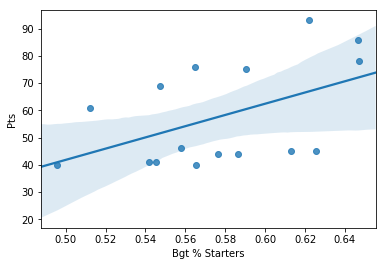

In [43]:
sns.regplot(x='Bgt % Starters', y='Pts', data=clubs_df)

In [44]:
club_position_percents = transpose_percents(df[df['Club'].isin(premier_clubs)].groupby(by=['Club', 'Primary position']).sum()['Wage'],
                   df[df['Club'].isin(premier_clubs)].groupby(by='Club').sum()['Wage'],
                   df['Primary position'].unique(), df[df['Club'].isin(premier_clubs)].groupby(by='Club').sum()['Wage'].index)

club_position_percents

CAM      CB     CDM      CF      CM      GK  \
Club                                                                     
Arsenal                 0.0030  0.1866  0.1264  0.0000  0.0662  0.0609   
Brighton & Hove Albion  0.0492  0.1280  0.0305  0.0659  0.1437  0.1093   
Burnley                 0.1413  0.0865  0.0827  0.0000  0.1413  0.1029   
Chelsea                 0.1219  0.1029  0.0243  0.0000  0.1219  0.0973   
Crystal Palace          0.0709  0.1641  0.0650  0.0000  0.0718  0.0453   
Everton                 0.0920  0.1965  0.0000  0.0000  0.1665  0.0716   
Huddersfield Town       0.1901  0.1901  0.0000  0.0000  0.1315  0.0651   
Leicester City          0.0597  0.1138  0.0000  0.0000  0.1279  0.0878   
Liverpool               0.2132  0.0867  0.0394  0.0315  0.1486  0.0908   
Manchester City         0.0048  0.1961  0.1063  0.0000  0.0387  0.0641   
Manchester United       0.0000  0.1670  0.1793  0.0000  0.0408  0.0947   
Newcastle United        0.0045  0.1655  0.1255  0.0000  0.1648  0.0499   
Southampton             0.1024  0.1936  0.1178  0.0000  0.0485  0.0705   
Stoke City              0.0904  0.1490  0.0983  0.0000  0.0499  0.0774   
Swansea City            0.0073  0.1627  0.1191  0.0000  0.1743  0.1038   
Tottenham Hotspur       0.0615  0.1790  0.0528  0.0000  0.0844  0.1285   
Watford                 0.0834  0.1956  0.0920  0.0000  0.1317  0.0538   
West Bromwich Albion    0.0543  0.1669  0.1142  0.0000  0.1214  0.0895   
West Ham United         0.0749  0.2160  0.0000  0.0000  0.0837  0.0997   

                            LB      LM      LW     LWB      RB      RM  \
Club                                                                     
Arsenal                 0.0000  0.0515  0.0000  0.0000  0.0831  0.1337   
Brighton & Hove Albion  0.0384  0.1289  0.0492  0.0394  0.0285  0.0945   
Burnley                 0.1625  0.0000  0.0000  0.0000  0.0577  0.0702   
Chelsea                 0.0913  0.0777  0.1399  0.0000  0.0410  0.0334   
Crystal Palace          0.1419  0.1573  0.0000  0.0231  0.0915  0.0692   
Everton                 0.0484  0.1200  0.0500  0.0000  0.0460  0.0388   
Huddersfield Town       0.0964  0.0352  0.0000  0.0000  0.0352  0.0703   
Leicester City          0.0675  0.1286  0.0000  0.0000  0.0759  0.0654   
Liverpool               0.0604  0.0000  0.0706  0.0240  0.0432  0.0000   
Manchester City         0.0019  0.1539  0.0282  0.0273  0.0504  0.1428   
Manchester United       0.0884  0.0583  0.0000  0.0000  0.0684  0.0766   
Newcastle United        0.1754  0.0665  0.0000  0.0000  0.0340  0.0711   
Southampton             0.1083  0.0367  0.0000  0.0000  0.0574  0.0610   
Stoke City              0.0029  0.0000  0.0000  0.0398  0.1106  0.0918   
Swansea City            0.0458  0.0414  0.0552  0.0000  0.0806  0.0516   
Tottenham Hotspur       0.0133  0.2084  0.0000  0.0757  0.0363  0.0000   
Watford                 0.0234  0.0951  0.0000  0.0413  0.0701  0.0343   
West Bromwich Albion    0.1142  0.1326  0.0000  0.0000  0.0519  0.0000   
West Ham United         0.0000  0.0563  0.0646  0.0739  0.0941  0.0372   

                            RW     RWB      ST  
Club                                            
Arsenal                 0.0881  0.0000  0.2005  
Brighton & Hove Albion  0.0000  0.0000  0.0945  
Burnley                 0.0000  0.0000  0.1548  
Chelsea                 0.0000  0.0000  0.1484  
Crystal Palace          0.0000  0.0000  0.1000  
Everton                 0.0420  0.0032  0.1248  
Huddersfield Town       0.0000  0.0169  0.1693  
Leicester City          0.0000  0.0000  0.2734  
Liverpool               0.0507  0.0394  0.1014  
Manchester City         0.0000  0.0412  0.1444  
Manchester United       0.0547  0.0000  0.1716  
Newcastle United        0.0000  0.0060  0.1368  
Southampton             0.0000  0.0000  0.2037  
Stoke City              0.0615  0.0448  0.1837  
Swansea City            0.0436  0.0000  0.1147  
Tottenham Hotspur       0.0000  0.0349  0.1253  
Watford                 0.0000  0.0

In [45]:
club_position_percents.describe().T.reset_index()

index  count      mean       std     min      25%     50%      75%     max
0    CAM   19.0  0.074989  0.061059  0.0000  0.02825  0.0709  0.09720  0.2132
1     CB   19.0  0.160347  0.039162  0.0865  0.13850  0.1669  0.19185  0.2160
2    CDM   19.0  0.072295  0.053762  0.0000  0.02740  0.0827  0.11600  0.1793
3     CF   19.0  0.005126  0.016391  0.0000  0.00000  0.0000  0.00000  0.0659
4     CM   19.0  0.108295  0.045580  0.0387  0.06900  0.1219  0.14250  0.1743
5     GK   19.0  0.082258  0.022583  0.0453  0.06460  0.0878  0.09850  0.1285
6     LB   19.0  0.067389  0.055823  0.0000  0.01835  0.0604  0.10235  0.1754
7     LM   19.0  0.081495  0.059551  0.0000  0.03905  0.0665  0.12875  0.2084
8     LW   19.0  0.024089  0.038345  0.0000  0.00000  0.0000  0.04960  0.1399
9    LWB   19.0  0.018132  0.025432  0.0000  0.00000  0.0000  0.03335  0.0757
10    RB   19.0  0.060837  0.023499  0.0285  0.04210  0.0574  0.07825  0.1106
11    RM   19.0  0.060100  0.039736  0.0000  0.03575  0.0654  0.07385  0.1428
12    RW   19.0  0.017926  0.028544  0.0000  0.00000  0.0000  0.04280  0.0881
13   RWB   19.0  0.016200  0.023502  0.0000  0.00000  0.0000  0.03715  0.0801
14    ST   19.0  0.150511  0.043717  0.0945  0.12210  0.1444  0.17045  0.2734

In [46]:
df.drop(['Value', 'Potential'], axis=1).corr()['Wage'].sort_values(ascending=False)

Wage                  1.000000
Overall               0.599083
Reactions             0.506668
Composure             0.395079
Vision                0.320997
Short passing         0.310575
Ball control          0.295538
Long passing          0.292915
Shot power            0.273714
Volleys               0.269999
Curve                 0.269720
Long shots            0.266417
Dribbling             0.250635
Free kick accuracy    0.249549
Crossing              0.245127
Positioning           0.244299
Penalties             0.239528
Finishing             0.234846
Aggression            0.208516
Heading accuracy      0.207430
Stamina               0.204691
Agility               0.174116
Strength              0.166227
Interceptions         0.165651
Age                   0.156170
Sprint speed          0.154934
Jumping               0.153348
Acceleration          0.147539
Standing tackle       0.132900
Sliding tackle        0.117754
Marking               0.112746
Balance               0.086495
GK handl

Text(0.5,1,'Mean Representing Percentage of Club Payroll by Position Across Premier League')

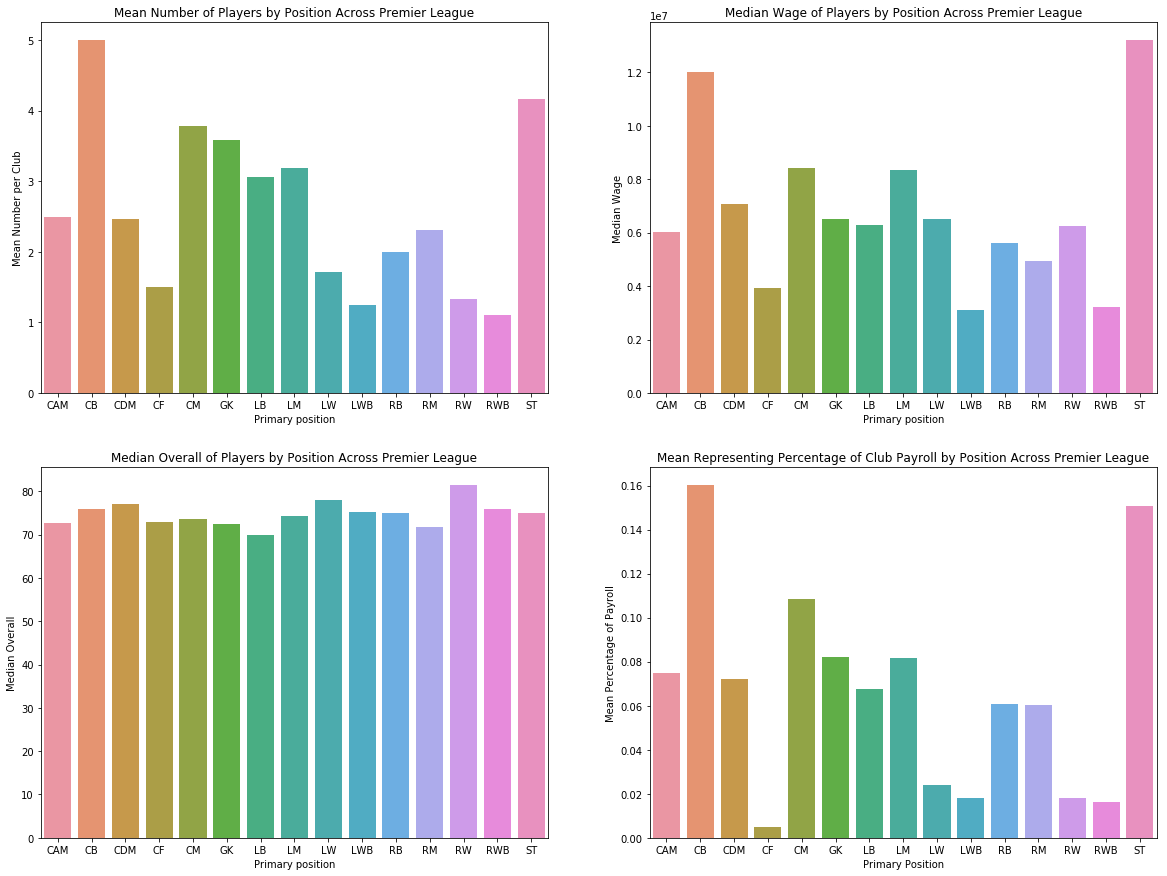

In [47]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.barplot(x='Primary position', y='Player type', data=club_type_count)
plt.ylabel('Mean Number per Club')
plt.title('Mean Number of Players by Position Across Premier League')

plt.subplot(2,2,2)
sns.barplot(x='Primary position', y='Wage', data=club_agg_payroll)
plt.ylabel('Median Wage')
plt.title('Median Wage of Players by Position Across Premier League')

plt.subplot(2,2,3)
sns.barplot(x='Primary position', y='Overall', data=club_type_median)
plt.ylabel('Median Overall')
plt.title('Median Overall of Players by Position Across Premier League')

plt.subplot(2,2,4)
sns.barplot(x='index', y='mean', data=club_position_percents.describe().T.reset_index())
plt.xlabel('Primary Position')
plt.ylabel('Mean Percentage of Payroll')
plt.title('Mean Representing Percentage of Club Payroll by Position Across Premier League')

In [48]:
#df.to_excel(pd.ExcelWriter('CleanData.xlsx'), 'Sheet1')

In [49]:
def bubble_plot(data, x, y, s, fig_size=(15,10), threshold=50, dot_size_factor=1, alpha=0.4):
    plt.figure(figsize=fig_size)
    plt.xticks(rotation='vertical')
    plt.grid()
    plt.scatter(x=data[x][:int(threshold)], y=data[y][:int(threshold)],
                s=data[s][:int(threshold)]*float(dot_size_factor), alpha=alpha)
    for i, txt in enumerate(data[y][:int(threshold)]):
        plt.axes().annotate(txt, (data[:int(threshold)].index[i], data[y][:int(threshold)][i]))
    plt.title('{0} by {1}, scaled by {2}'.format(y, x, s))

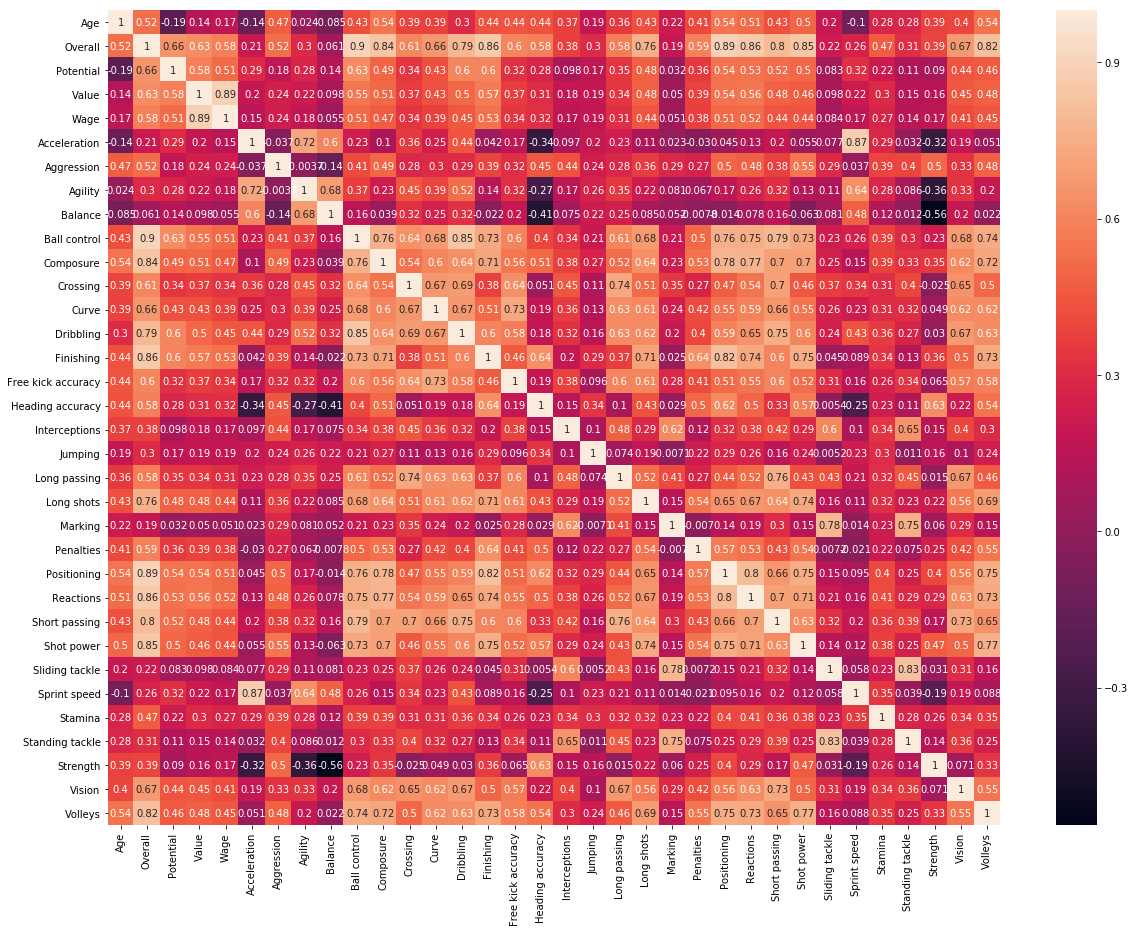

In [50]:
# For all strikers
plt.figure(figsize=(20,15))
sns.heatmap(df[df['Primary position'] == 'ST'].drop(['GK diving', 'GK handling', 'GK kicking', 'GK reflexes', 'GK positioning'], 
                                                axis=1).corr(), annot=True)

# Variables for payroll regression
* mean pay for top 11, 7 subs,
* budget proportion spent on top 11, 7 subs


In [51]:
def make_corr_df(data, category, target, exclusions=None):
    for c, i in enumerate(data[category].unique()):
        if exclusions is not None:
            if c != 0:
                #temp_df = pd.DataFrame(data[data[category] == i].drop(exclusions, 
                                                                      #axis=1).corr()[target].sort_values(ascending=False))
                temp_df = data[data[category] == i].drop(exclusions, 
                                                         axis=1).corr()[target].sort_values(ascending=False).to_frame()
                temp_df.reset_index(inplace=True)
                temp_df.rename({'index': '{0} Attribute'.format(i), 'Overall': '{0} Corr.'.format(i)}, 
                               axis=1, inplace=True)
                temp_final_df = pd.concat([temp_final_df, temp_df], axis=1)
            else:
                #temp_df = pd.DataFrame(data[data[category] == i].drop(exclusions, 
                                                                      #axis=1).corr()[target].sort_values(ascending=False))
                temp_df = data[data[category] == i].drop(exclusions, 
                                                         axis=1).corr()[target].sort_values(ascending=False).to_frame()
                temp_df.reset_index(inplace=True)
                temp_df.rename({'index': '{0} Attribute'.format(i), 'Overall': '{0} Corr.'.format(i)}, 
                               axis=1, inplace=True)
                temp_final_df = pd.DataFrame(index = temp_df.index)
                temp_final_df = pd.concat([temp_final_df, temp_df], axis=1)
        else:
            if c != 0:
                temp_df = pd.DataFrame(data[data[category] == i].corr()[target].sort_values(ascending=False))
                #temp_df = data[data[category] == i].corr()[target].sort_values(ascending=False).to_frame()
                temp_df.reset_index(inplace=True)
                temp_df.rename({'index': '{0} Attribute'.format(i), 'Overall': '{0} Corr.'.format(i)}, 
                               axis=1, inplace=True)
                temp_final_df = pd.concat([temp_final_df, temp_df], axis=1)
            else:
                #temp_df = pd.DataFrame(data[data[category] == i].corr()[target].sort_values(ascending=False))
                temp_df = data[data[category] == i].corr()[target].sort_values(ascending=False).to_frame()
                temp_df.reset_index(inplace=True)
                temp_df.rename({'index': '{0} Attribute'.format(i), 'Overall': '{0} Corr.'.format(i)}, 
                               axis=1, inplace=True)
                temp_final_df = pd.DataFrame(index = temp_df.index)
                temp_final_df = pd.concat([temp_final_df, temp_df], axis=1)
    return temp_final_df

In [52]:
pl_positions_corr = make_corr_df(pl_df, 'Primary position', 'Overall', exclusions=['GK diving', 'GK handling', 'GK kicking', 
                                                            'GK reflexes', 'GK positioning'])
pl_positions_corr

GK Attribute  GK Corr.        LW Attribute  LW Corr.  \
0              Overall  1.000000             Overall  1.000000   
1            Reactions  0.932244           Dribbling  0.981695   
2                 Wage  0.816618           Composure  0.981054   
3            Potential  0.717469        Ball control  0.975151   
4                Value  0.646259         Positioning  0.972838   
5                  Age  0.634255       Short passing  0.947086   
6            Composure  0.634197           Reactions  0.929691   
7              Agility  0.588246           Finishing  0.915281   
8               Vision  0.581677             Stamina  0.914394   
9         Long passing  0.568927               Curve  0.909238   
10       Interceptions  0.555875                Wage  0.907101   
11        Acceleration  0.535404              Vision  0.873517   
12        Sprint speed  0.521050             Volleys  0.860454   
13             Jumping  0.518637            Crossing  0.818581   
14        Ball control  0.507538               Value  0.813382   
15            Strength  0.432341          Long shots  0.805101   
16             Stamina  0.413101           Penalties  0.781501   
17           Penalties  0.407660                 Age  0.779309   
18       Short passing  0.397078             Agility  0.770475   
19         Positioning  0.387597          Shot power  0.767964   
20          Shot power  0.354949        Long passing  0.713448   
21          Long shots  0.323542        Acceleration  0.711532   
22             Marking  0.293848           Potential  0.695831   
23            Crossing  0.252584        Sprint speed  0.687358   
24    Heading accuracy  0.231976    Heading accuracy  0.640839   
25  Free kick accuracy  0.229466            Strength  0.503288   
26          Aggression  0.216991             Jumping  0.474341   
27      Sliding tackle  0.216319          Aggression  0.470088   
28     Standing tackle  0.172611       Interceptions  0.417434   
29             Volleys  0.163432  Free kick accuracy  0.412775   
30               Curve  0.159113             Balance  0.291371   
31           Finishing  0.132290             Marking -0.001037   
32             Balance  0.126174     Standing tackle -0.018019   
33           Dribbling  0.110630      Sliding tackle -0.128276   

          RM Attribute  RM Corr.        ST Attribute  ST Corr.  \
0              Overall  1.000000             Overall  1.000000   
1        Short passing  0.953655         Positioning  0.947670   
2            Composure  0.947474           Finishing  0.942878   
3            Reactions  0.944430           Composure  0.942176   
4          Positioning  0.936690          Shot power  0.933979   
5         Ball control  0.930774        Ball control  0.932114   
6             Crossing  0.925147           Reactions  0.926454   
7               Vision  0.917664          Long shots  0.897236   
8         Long passing  0.866533           Dribbling  0.868249   
9            Dribbling  0.860111             Volleys  0.864726   
10           Finishing  0.855945       Short passing  0.862777   
11                Wage  0.846163                Wage  0.849953   
12             Volleys  0.839387              Vision  0.800979   
13             Stamina  0.826291               Curve  0.782125   
14          Long shots  0.820377           Penalties  0.781894   
15          Shot power  0.799177               Value  0.767125   
16               Value  0.755323            Crossing  0.733845   
17               Curve  0.737895           Potential  0.731837   
18           Penalties  0.726516             Stamina  0.699965   
19                 Age  0.696667                 Age  0.685860   
20           Potential  0.688065    Heading accuracy  0.672240   
21  Free kick accuracy  0.639316  Free kick accuracy  0.638009   
22          Aggression  0.616430        Long passing  0.628485   
23             Jumping  0.606759            Strength  0.610889   
24             Agility  0.556467          Aggress

In [53]:
all_positions_corr = make_corr_df(df, 'Primary position', 'Overall', exclusions=['GK diving', 'GK handling', 'GK kicking', 
                                                            'GK reflexes', 'GK positioning'])
all_positions_corr

ST Attribute  ST Corr.        RW Attribute  RW Corr.  \
0              Overall  1.000000             Overall  1.000000   
1         Ball control  0.897100        Ball control  0.898031   
2          Positioning  0.890676         Positioning  0.861242   
3            Finishing  0.862167           Dribbling  0.858053   
4            Reactions  0.860980           Reactions  0.845067   
5           Shot power  0.847000       Short passing  0.832016   
6            Composure  0.838299           Composure  0.831523   
7              Volleys  0.817011              Vision  0.804047   
8        Short passing  0.799535          Long shots  0.786427   
9            Dribbling  0.788193               Curve  0.712566   
10          Long shots  0.762945           Potential  0.700994   
11              Vision  0.670320           Finishing  0.689067   
12               Curve  0.664431               Value  0.687326   
13           Potential  0.657414            Crossing  0.684532   
14               Value  0.628194        Long passing  0.669502   
15            Crossing  0.605926          Shot power  0.663939   
16  Free kick accuracy  0.604433             Volleys  0.656212   
17           Penalties  0.585929  Free kick accuracy  0.643778   
18                Wage  0.582631                Wage  0.603210   
19    Heading accuracy  0.578966           Penalties  0.541347   
20        Long passing  0.577039             Agility  0.530442   
21                 Age  0.523782             Stamina  0.490538   
22          Aggression  0.522329        Acceleration  0.455201   
23             Stamina  0.467018        Sprint speed  0.435245   
24            Strength  0.391855          Aggression  0.415604   
25       Interceptions  0.375652                 Age  0.415194   
26     Standing tackle  0.313325    Heading accuracy  0.394955   
27             Jumping  0.299826       Interceptions  0.351998   
28             Agility  0.296038            Strength  0.305942   
29        Sprint speed  0.262068             Jumping  0.270686   
30      Sliding tackle  0.220266             Balance  0.244735   
31        Acceleration  0.210647     Standing tackle  0.215586   
32             Marking  0.194667             Marking  0.144603   
33             Balance  0.061223      Sliding tackle  0.130897   

          LW Attribute  LW Corr.        GK Attribute  GK Corr.  \
0              Overall  1.000000             Overall  1.000000   
1         Ball control  0.918975           Reactions  0.856939   
2            Dribbling  0.884402           Potential  0.719018   
3        Short passing  0.865755                Wage  0.605580   
4          Positioning  0.860232               Value  0.585745   
5            Reactions  0.853961                 Age  0.520104   
6            Composure  0.799260           Composure  0.448194   
7               Vision  0.794709             Jumping  0.429656   
8           Long shots  0.760851        Sprint speed  0.418520   
9            Finishing  0.748446        Acceleration  0.409787   
10               Curve  0.729376              Vision  0.399712   
11             Volleys  0.723824             Agility  0.397969   
12            Crossing  0.708101            Strength  0.374797   
13           Potential  0.703165       Interceptions  0.366086   
14                Wage  0.672334             Stamina  0.319080   
15        Long passing  0.664353          Aggression  0.313083   
16               Value  0.658496         Positioning  0.296144   
17          Shot power  0.643621        Ball control  0.284691   
18  Free kick accuracy  0.619465          Long shots  0.263313   
19             Agility  0.596897           Penalties  0.247746   
20             Stamina  0.562674             Volleys  0.247401   
21           Penalties  0.528974           Finishing  0.246534   
22        Acceleration  0.511889       Short passing  0.230896   
23        Sprint speed  0.452592             Marking  0.227495   
24                 Age  0.404657        Long pass

In [54]:
gk_corr = df[df['Primary position'] == 'GK'].corr()['Overall'].sort_values(ascending=False)
gk_corr.to_frame().reset_index(inplace=True)
gk_corr.rename({'index': 'Attribute'}, inplace=True)
gk_corr[1:5]

GK reflexes       0.930927
GK positioning    0.928637
GK diving         0.928624
GK handling       0.910209
Name: Overall, dtype: float64

In [55]:
position_D_c = pd.DataFrame(df[df['Position type'] == 'D'].drop(['GK diving', 'GK handling', 'GK kicking', 
                                                        'GK reflexes', 'GK positioning'], 
                                                       axis=1).corr()['Overall'].sort_values(ascending=False))
position_D_c.reset_index(inplace=True)
position_D_c.rename({'index': 'D Attribute', 'Overall': 'D Corr.'}, axis=1, inplace=True)

position_M_c = pd.DataFrame(df[df['Position type'] == 'M'].drop(['GK diving', 'GK handling', 'GK kicking', 
                                                        'GK reflexes', 'GK positioning'], 
                                                       axis=1).corr()['Overall'].sort_values(ascending=False))
position_M_c.reset_index(inplace=True)
position_M_c.rename({'index': 'M Attribute', 'Overall': 'M Corr.'}, axis=1, inplace=True)

position_F_c = pd.DataFrame(df[df['Position type'] == 'F'].drop(['GK diving', 'GK handling', 'GK kicking', 
                                                        'GK reflexes', 'GK positioning'], 
                                                       axis=1).corr()['Overall'].sort_values(ascending=False))
position_F_c.reset_index(inplace=True)
position_F_c.rename({'index': 'F Attribute', 'Overall': 'F Corr.'}, axis=1, inplace=True)

position_stats_c = pd.concat([position_F_c, position_M_c, position_D_c], axis=1)


type_D_c = pd.DataFrame(df[df['Player type'] == 'D'].drop(['GK diving', 'GK handling', 'GK kicking', 
                                                        'GK reflexes', 'GK positioning'], 
                                                       axis=1).corr()['Overall'].sort_values(ascending=False))
type_D_c.reset_index(inplace=True)
type_D_c.rename({'index': 'D Attribute', 'Overall': 'D Corr.'}, axis=1, inplace=True)

type_M_c = pd.DataFrame(df[df['Player type'] == 'M'].drop(['GK diving', 'GK handling', 'GK kicking', 
                                                        'GK reflexes', 'GK positioning'], 
                                                       axis=1).corr()['Overall'].sort_values(ascending=False))
type_M_c.reset_index(inplace=True)
type_M_c.rename({'index': 'M Attribute', 'Overall': 'M Corr.'}, axis=1, inplace=True)

type_O_c = pd.DataFrame(df[df['Player type'] == 'O'].drop(['GK diving', 'GK handling', 'GK kicking', 
                                                        'GK reflexes', 'GK positioning'], 
                                                       axis=1).corr()['Overall'].sort_values(ascending=False))
type_O_c.reset_index(inplace=True)
type_O_c.rename({'index': 'O Attribute', 'Overall': 'O Corr.'}, axis=1, inplace=True)

type_stats_c = pd.concat([type_O_c, type_M_c, type_D_c], axis=1)

In [56]:
def regplot_subplots(data, x, y, filter_variable=None, fit_reg=False, width=20, height_step=7.5,
                    supplementary_title='', annotation=False, x_line=0, y_line=0):
    # 2 types of plots
    # One in which x remains constant, and y changes; each plot is a new y
    # In this case, y should be a list of feature names
    # One in which x and y remain constant; each plot is a new category type
    # In this case, filter_variable should be a categorical feature name
    line = False
    if x_line != 0 or y_line != 0:
        line = True
    if filter_variable is None:
        plt.figure(figsize=(float(width), float(height_step)*float(math.ceil(len(y)/2))))
        for i, var in enumerate(y):
            plt.subplot(math.ceil(len(y)/2), 2, i+1)
            sns.regplot(y=var, x=x, data=data, fit_reg=fit_reg)
            if line is True:
                plt.axvline(x=x_line, color='r')
                plt.axhline(y=y_line, color='r')
            plt.title('{0} by {1}{2}'.format(x, var, supplementary_title))
    else:
        categories = data[filter_variable].unique()
        plt.figure(figsize=(float(width), float(height_step)*float(math.ceil(len(categories)/2))))
        for i, category in enumerate(categories):
            plt.subplot(math.ceil(len(categories)/2), 2, i+1)
            sns.regplot(y=y, x=x, data=data[data[filter_variable] == category], fit_reg=fit_reg)
            if line is True:
                plt.axvline(x=x_line, color='r')
                plt.axhline(y=y_line, color='r')
            plt.title('{0} by {1}, {2} {3}'.format(x, y, filter_variable, category))

In [57]:
def annotated_regplot(data, x, y, supplementary_id=None, supplementary_title='', figsize=(10,7.5), rotation=0):
    plt.figure(figsize=figsize)
    plt.title('{0} by {1}{2}'.format(x, y, supplementary_title))
    sns.regplot(x=x, y=y, data=data, fit_reg=False, scatter_kws={'s': 1500, 'alpha': 0.5})
    for i in range(len(data[x].index)):
        annot = data.index[i]
        plt.axes().annotate(annot, (data[x].iloc[i], data[y].iloc[i]), verticalalignment='bottom',
                           rotation=rotation)
    if supplementary_id is not None:
        for i in range(len(data[supplementary_id])):
            annot = data[supplementary_id].iloc[i]
            plt.axes().annotate(annot, (data[x].iloc[i], data[y].iloc[i]), verticalalignment='top',
                               rotation=rotation)

In [58]:
def stack_annot_sp(corr_df, x, y_vars, rotation=0, supplementary_id=None, supplementary_title=None):
    for y in y_vars:
        annotated_regplot(corr_df, x, y, rotation=rotation, supplementary_title=supplementary_title,
                         supplementary_id=supplementary_id)

In [59]:
starting_roster = pd.DataFrame()
sub_roster = pd.DataFrame()
reserve_roster = pd.DataFrame()

# Strikers

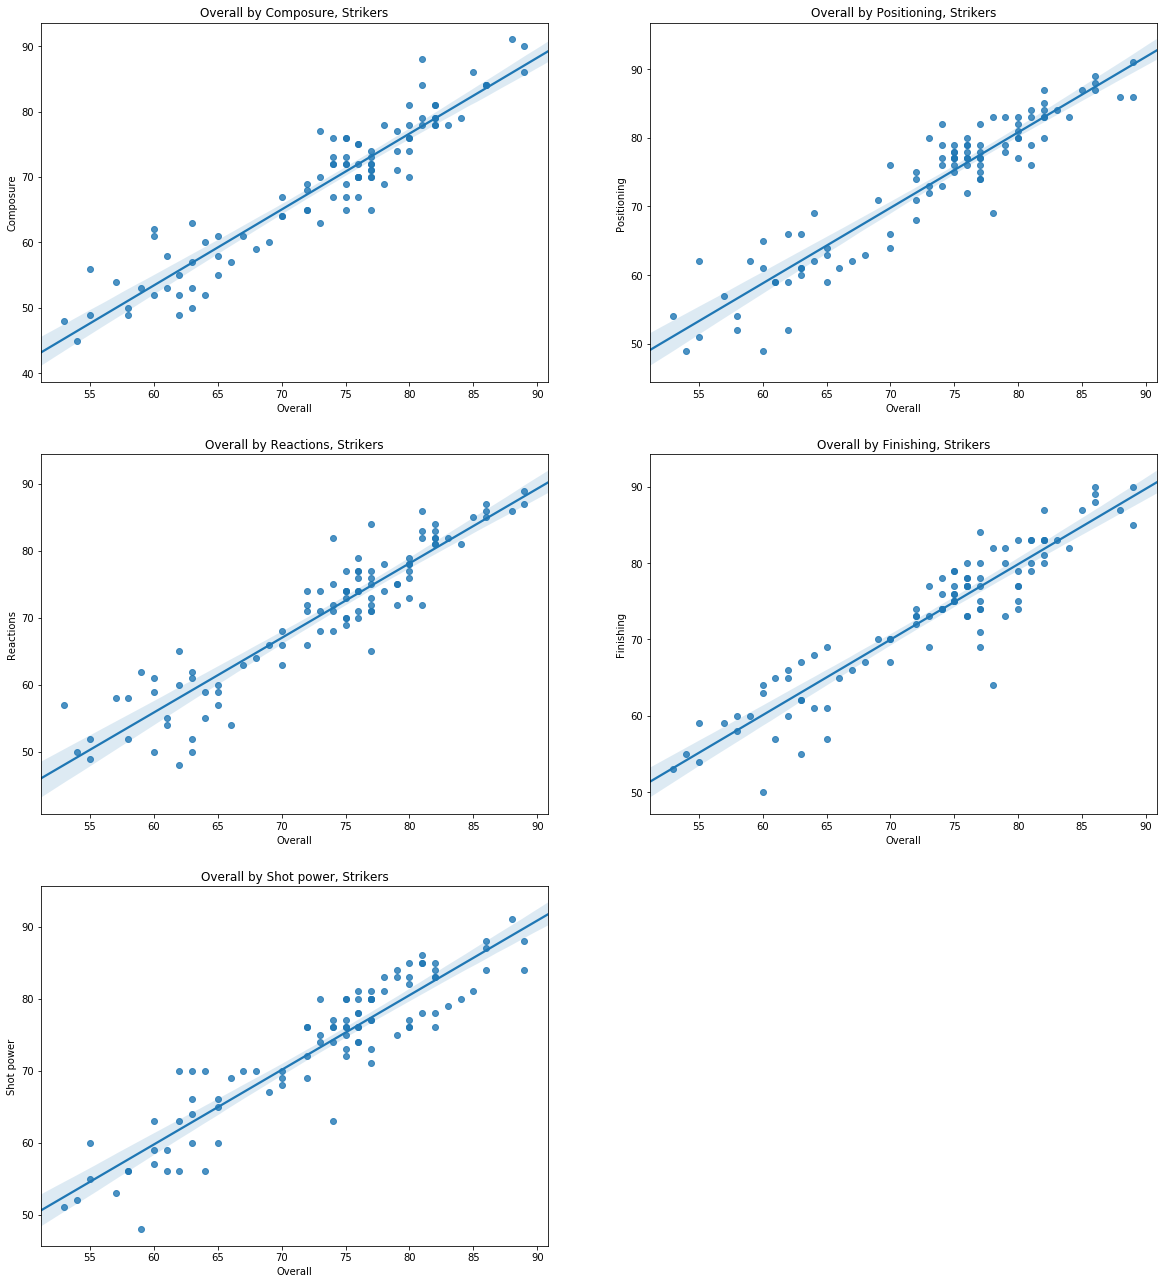

In [60]:
st_pos_cor = pl_df[(pl_df['PP_1'] == 'ST') | (pl_df['PP_2'] == 'ST') | (pl_df['PP_3'] == 'ST') | (pl_df['PP_4'] == 'ST')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'ST') | (pl_df['PP_2'] == 'ST') | (pl_df['PP_3'] == 'ST') | (pl_df['PP_4'] == 'ST')]
regplot_subplots(temp_df_1, 'Overall', st_pos_cor.index[1:6],
                supplementary_title=', Strikers', fit_reg=True)

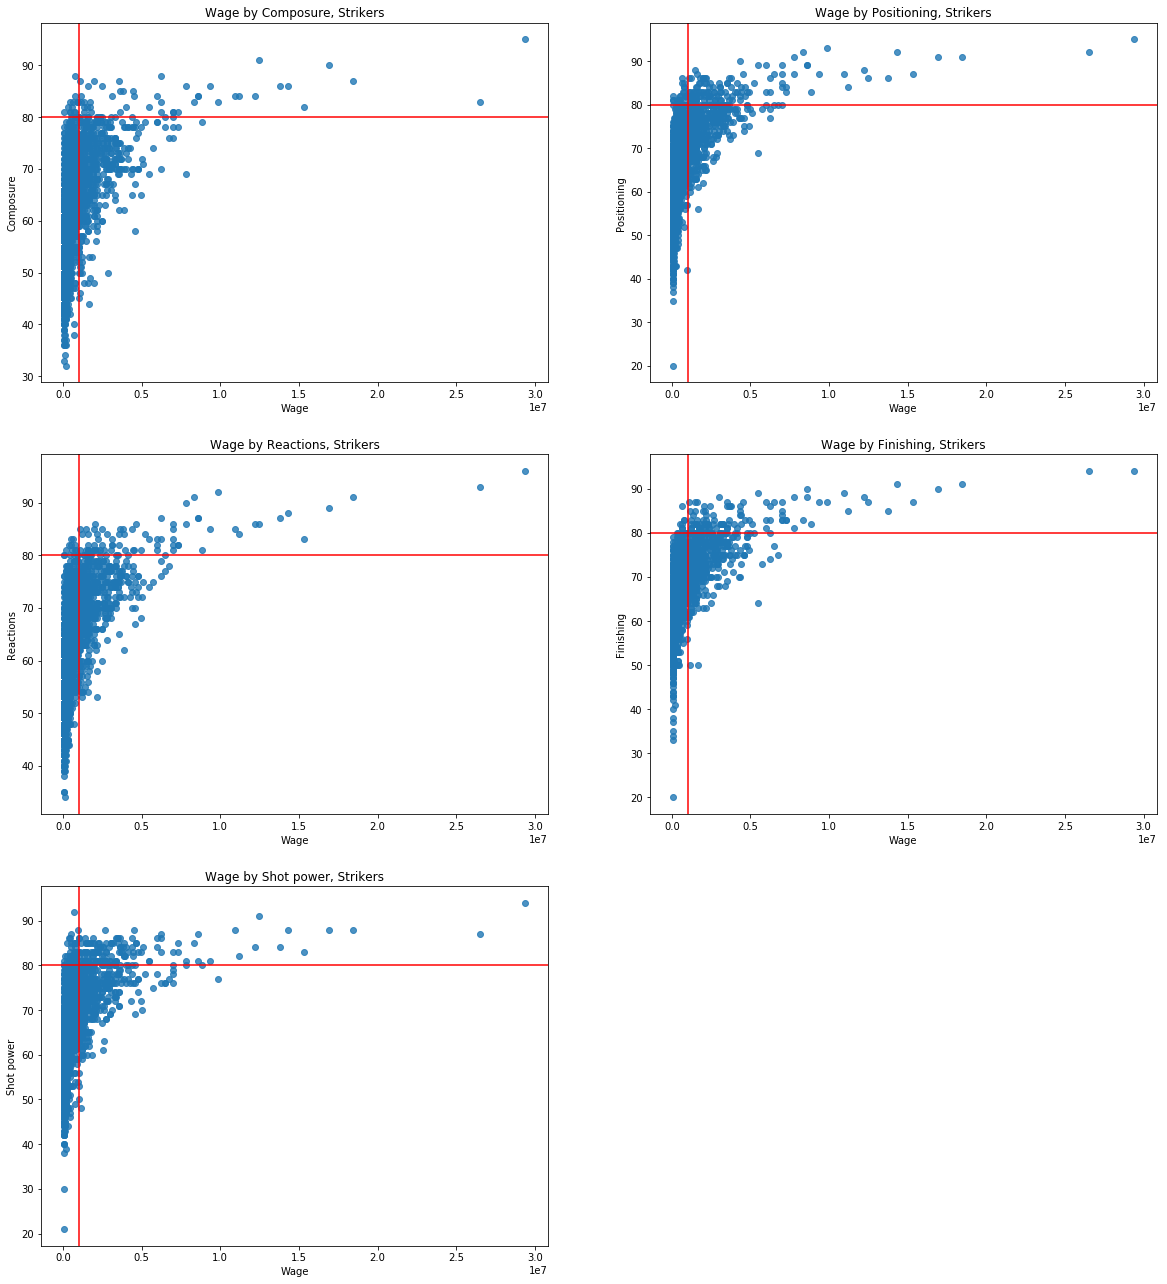

In [61]:
temp_df_2 = df[(df['PP_1'] == 'ST') | (df['PP_2'] == 'ST') | (df['PP_3'] == 'ST') | (df['PP_4'] == 'ST')]
#regplot_subplots(temp_df_2, 'Wage', st_pos_cor.index[1:6], supplementary_title=', Strikers', x_line=3663636, y_line=80)
regplot_subplots(temp_df_2, 'Wage', st_pos_cor.index[1:6], supplementary_title=', Strikers', x_line=1033333, y_line=80)

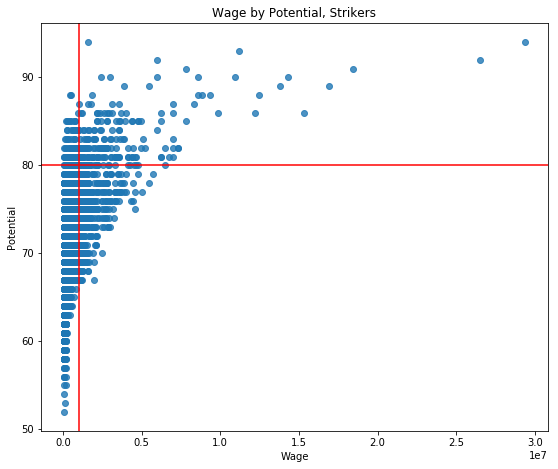

In [62]:
regplot_subplots(temp_df_2, 'Wage', ['Potential'], supplementary_title=', Strikers', x_line=1033333, y_line=80)

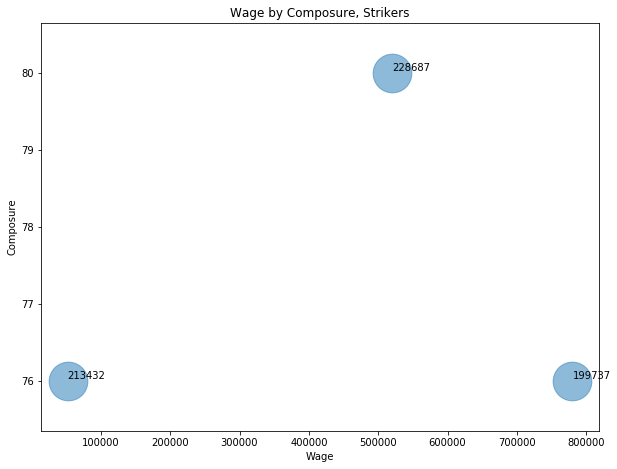

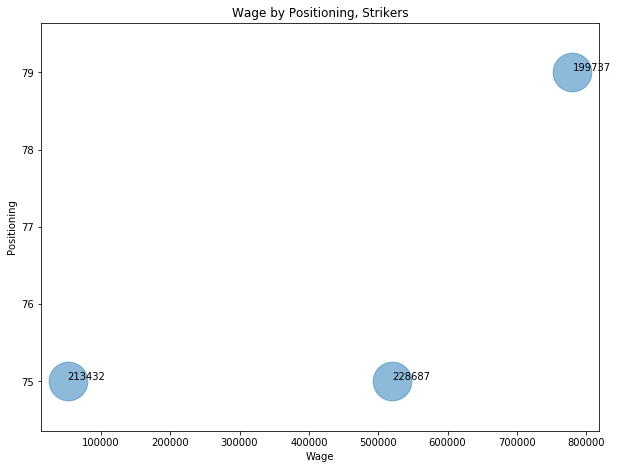

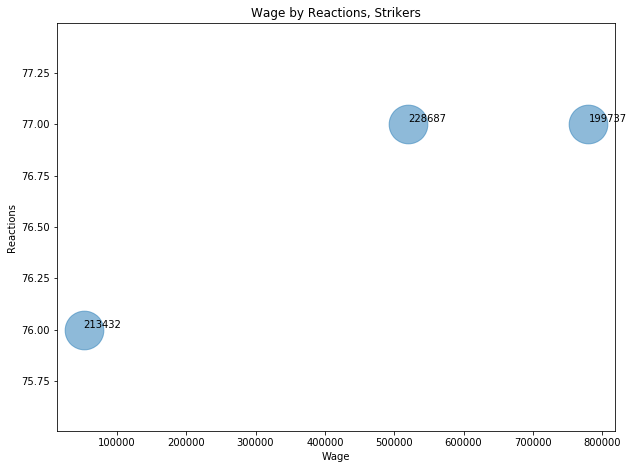

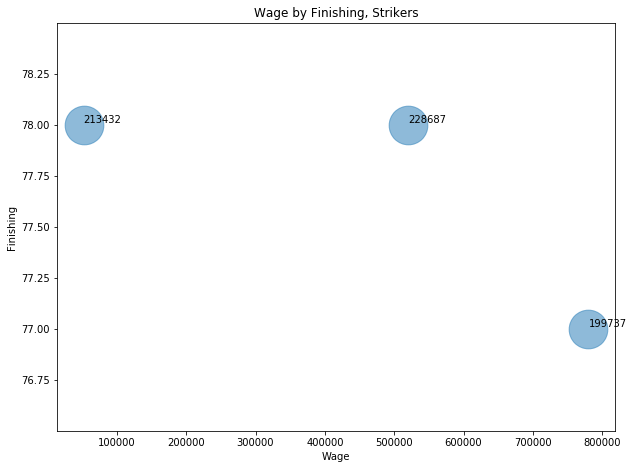

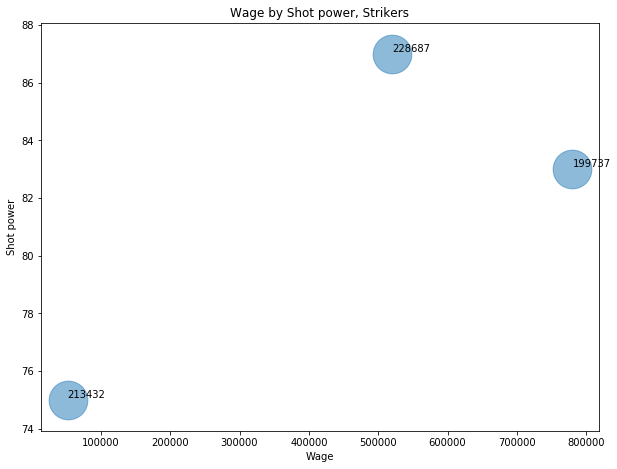

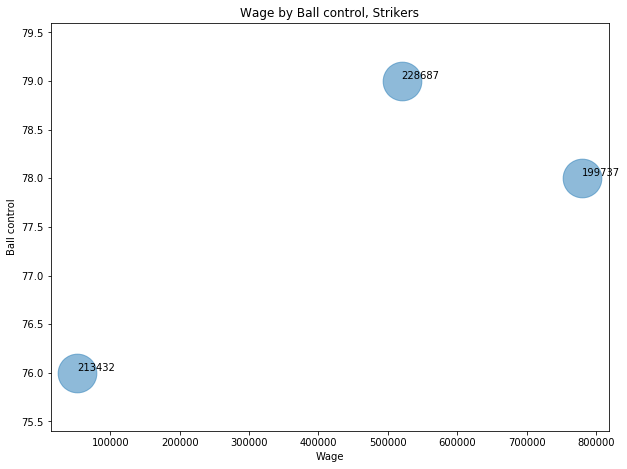

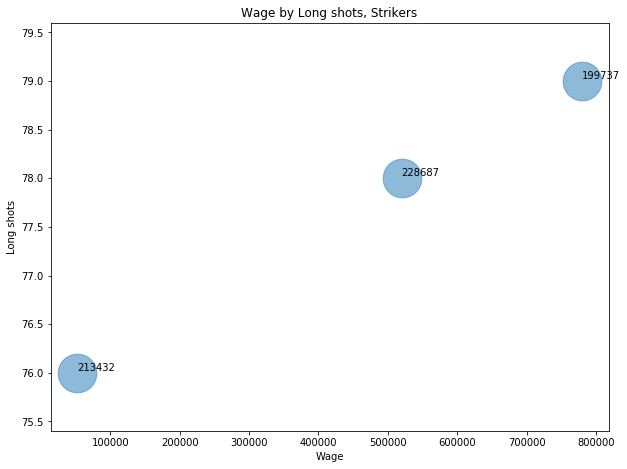

In [63]:
plt.figure(figsize=(10,10))
temp_df_3 = temp_df_2[(temp_df_2['Composure'] >= 75) & 
                      (temp_df_2['Positioning'] >= 75) & 
                      (temp_df_2['Reactions'] >= 75) & 
                      (temp_df_2['Finishing'] >= 75) & 
                      (temp_df_2['Shot power'] >= 75) & 
                      (temp_df_2['Ball control'] >= 75) & 
                      (temp_df_2['Age'] <= 26) &
                      #(temp_df_2['Wage'] <= 3663636)]
                      #(temp_df_2['Wage'] <= 7500000)]
                      (temp_df_2['Wage'] <= 1033333)]
stack_annot_sp(temp_df_3, 'Wage', st_pos_cor.index[1:8], 
               rotation=0, supplementary_title=', Strikers')

# CHOSEN STRIKERS:
* 188350
* 176769
* SUB (183574)
* RES (213432)
* RES (228687)
* RES (199737)

In [64]:
starting_roster = starting_roster.append(df.loc[176769])
starting_roster = starting_roster.append(df.loc[188350])
sub_roster = sub_roster.append(df.loc[183574])
reserve_roster = reserve_roster.append(df.loc[199737])
reserve_roster = reserve_roster.append(df.loc[228687])
reserve_roster = reserve_roster.append(df.loc[213432])

# Right Mids

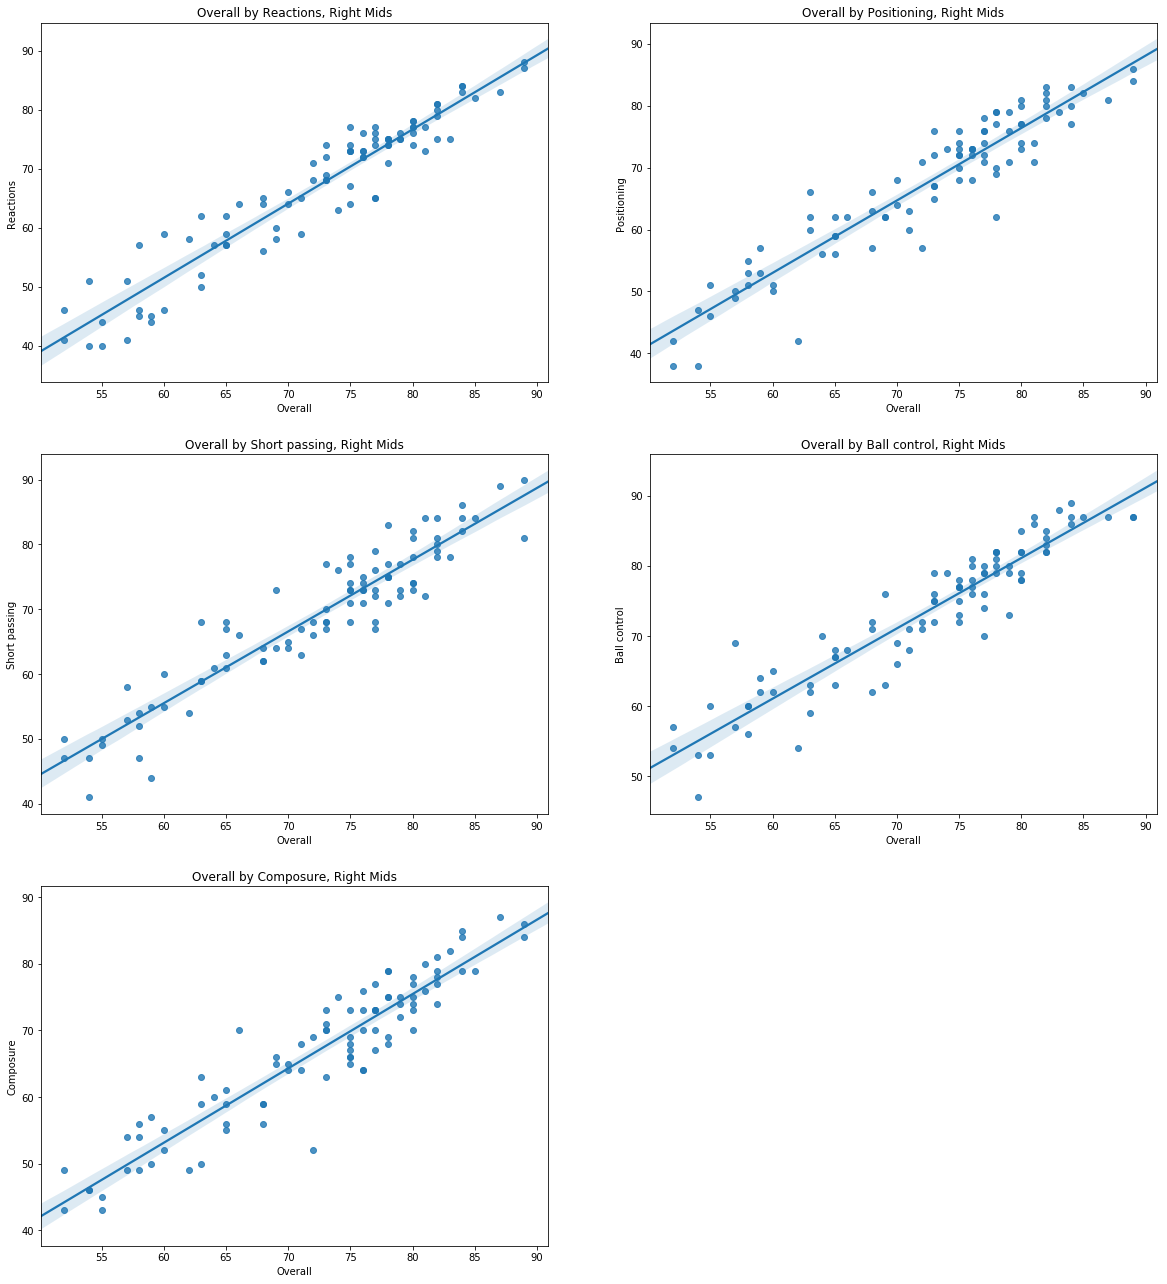

In [65]:
rm_pos_cor = pl_df[(pl_df['PP_1'] == 'RM') | (pl_df['PP_2'] == 'RM') | (pl_df['PP_3'] == 'RM') | (pl_df['PP_4'] == 'RM')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'RM') | (pl_df['PP_2'] == 'RM') | (pl_df['PP_3'] == 'RM') | (pl_df['PP_4'] == 'RM')]
regplot_subplots(temp_df_1, 'Overall', rm_pos_cor.index[1:6],
                supplementary_title=', Right Mids', fit_reg=True)

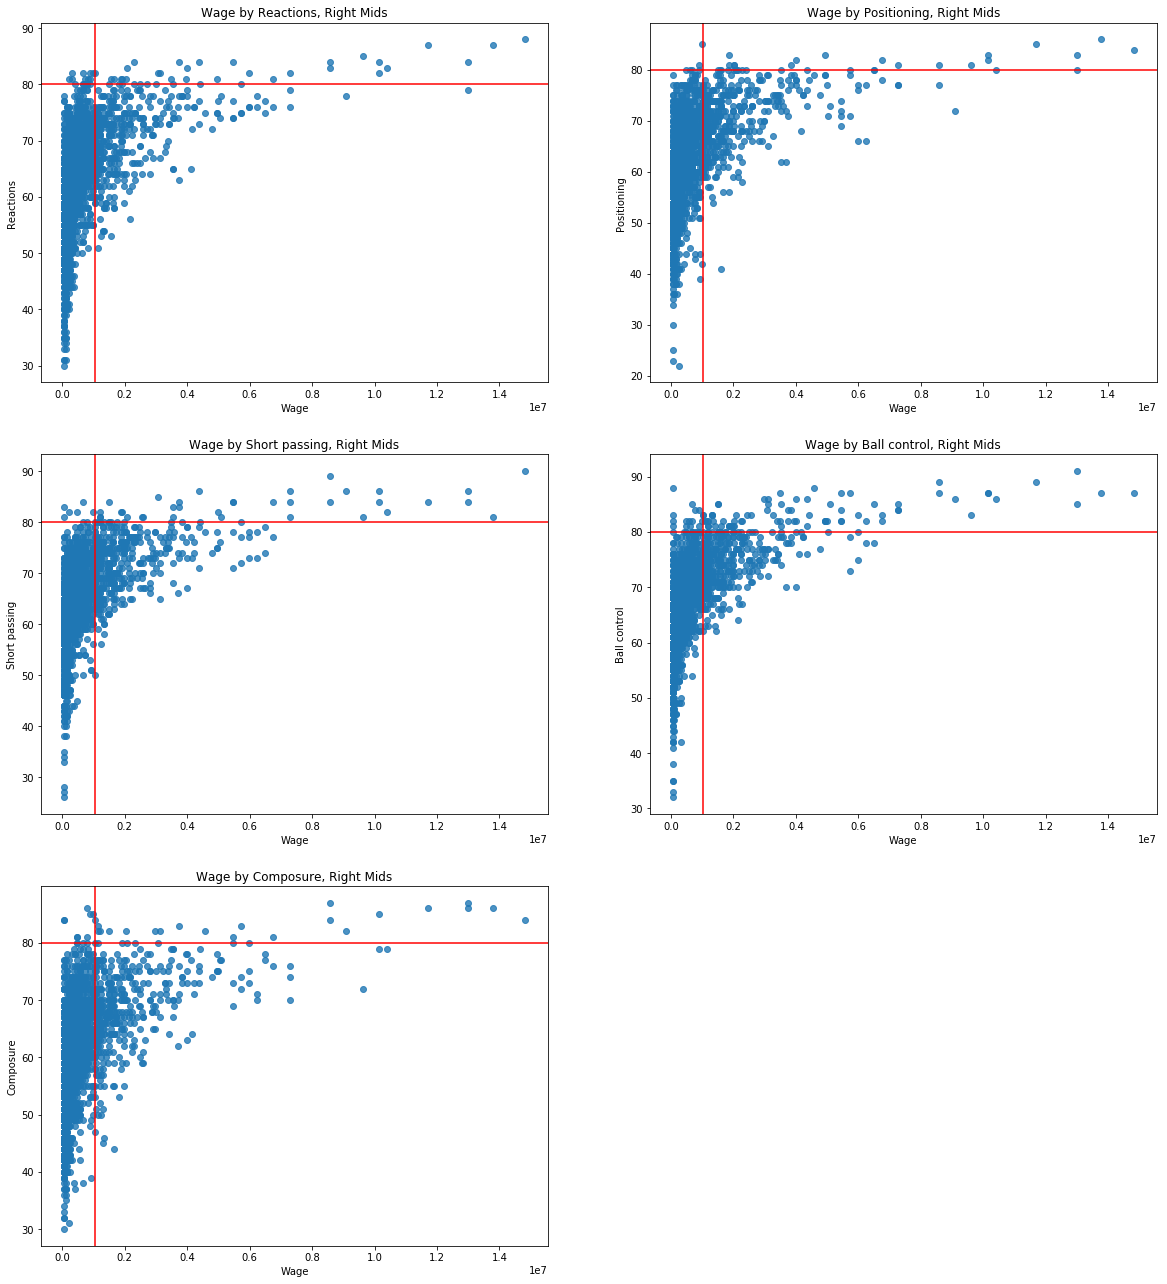

In [66]:
temp_df_2 = df[(df['PP_1'] == 'RM') | (df['PP_2'] == 'RM') | (df['PP_3'] == 'RM') | (df['PP_4'] == 'RM')]
regplot_subplots(temp_df_2, 'Wage', rm_pos_cor.index[1:6],
                #supplementary_title=', Right Mids', x_line=3663636, y_line=80)
                 supplementary_title=', Right Mids', x_line=1033333, y_line=80)

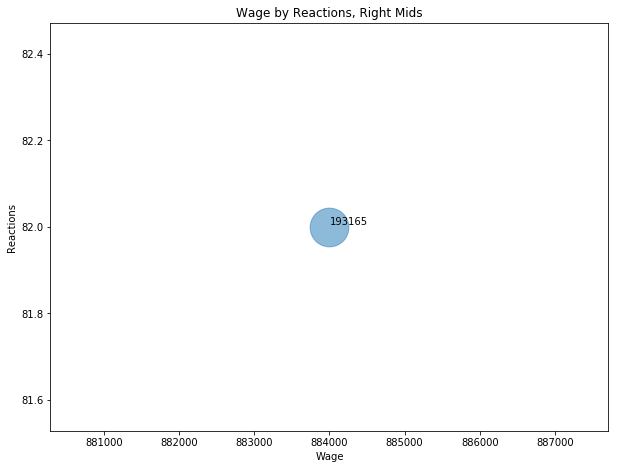

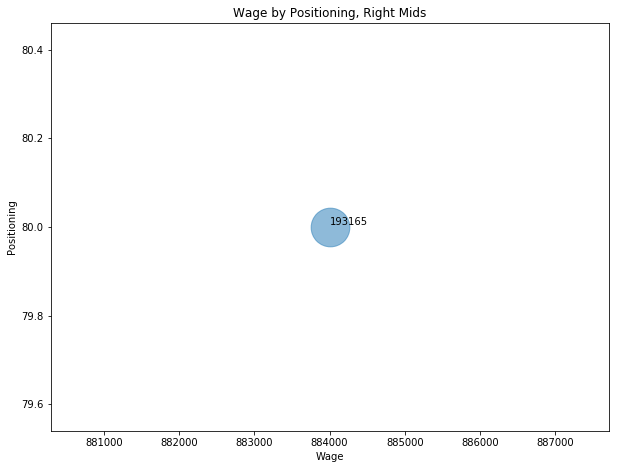

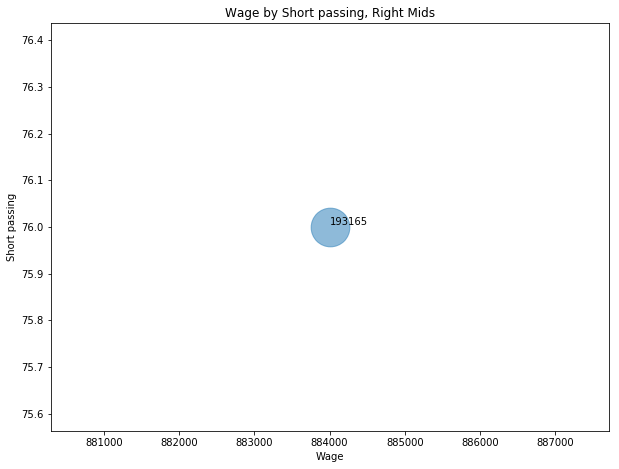

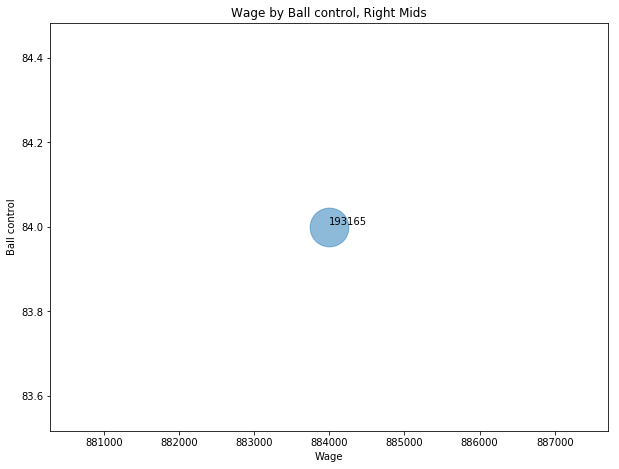

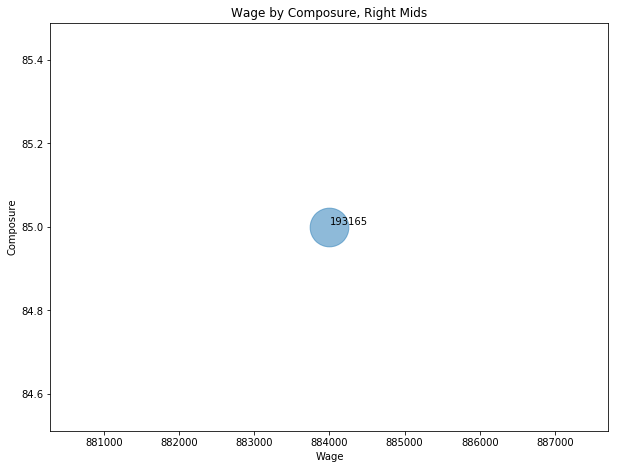

In [67]:
temp_df_3 = temp_df_2[(temp_df_2['Composure'] >= 75) & 
                #(temp_df_2['Composure'] >= 80) &
                #(temp_df_2['Positioning'] >= 80) &
                (temp_df_2['Positioning'] >= 75) &
                (temp_df_2['Reactions'] >= 80) &
                (temp_df_2['Ball control'] >= 80) &
                (temp_df_2['Short passing'] >= 75) &
                (temp_df_2['Age'] <= 26) &  
                (temp_df_2['Wage'] <= 1033333)]
stack_annot_sp(temp_df_3, 'Wage', rm_pos_cor.index[1:6], rotation=0, supplementary_title=', Right Mids')

# CHOSEN RIGHT MIDS
* 204970
* SUB (197965)
* RES (193165)

In [68]:
starting_roster = starting_roster.append(df.loc[204970])
sub_roster = sub_roster.append(df.loc[197965])
reserve_roster = reserve_roster.append(df.loc[193165])

# LEFT MIDS

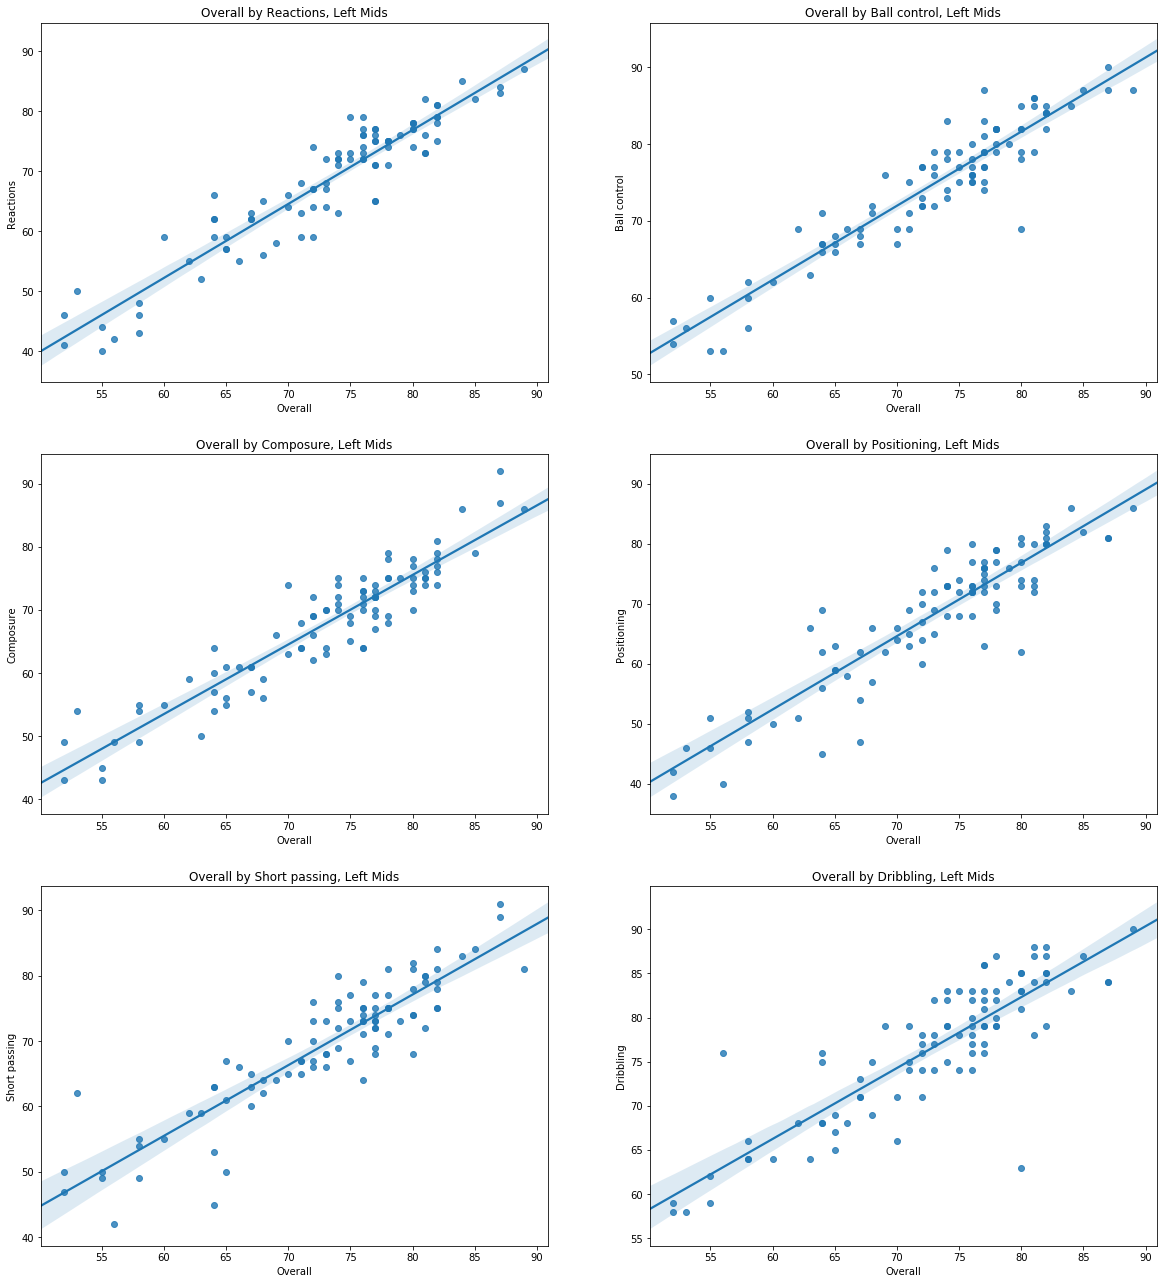

In [69]:
lm_pos_cor = pl_df[(pl_df['PP_1'] == 'LM') | (pl_df['PP_2'] == 'LM') | (pl_df['PP_3'] == 'LM') | (pl_df['PP_4'] == 'LM')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'LM') | (pl_df['PP_2'] == 'LM') | (pl_df['PP_3'] == 'LM') | (pl_df['PP_4'] == 'LM')]
regplot_subplots(temp_df_1, 'Overall', lm_pos_cor.index[1:7],
                supplementary_title=', Left Mids', fit_reg=True)

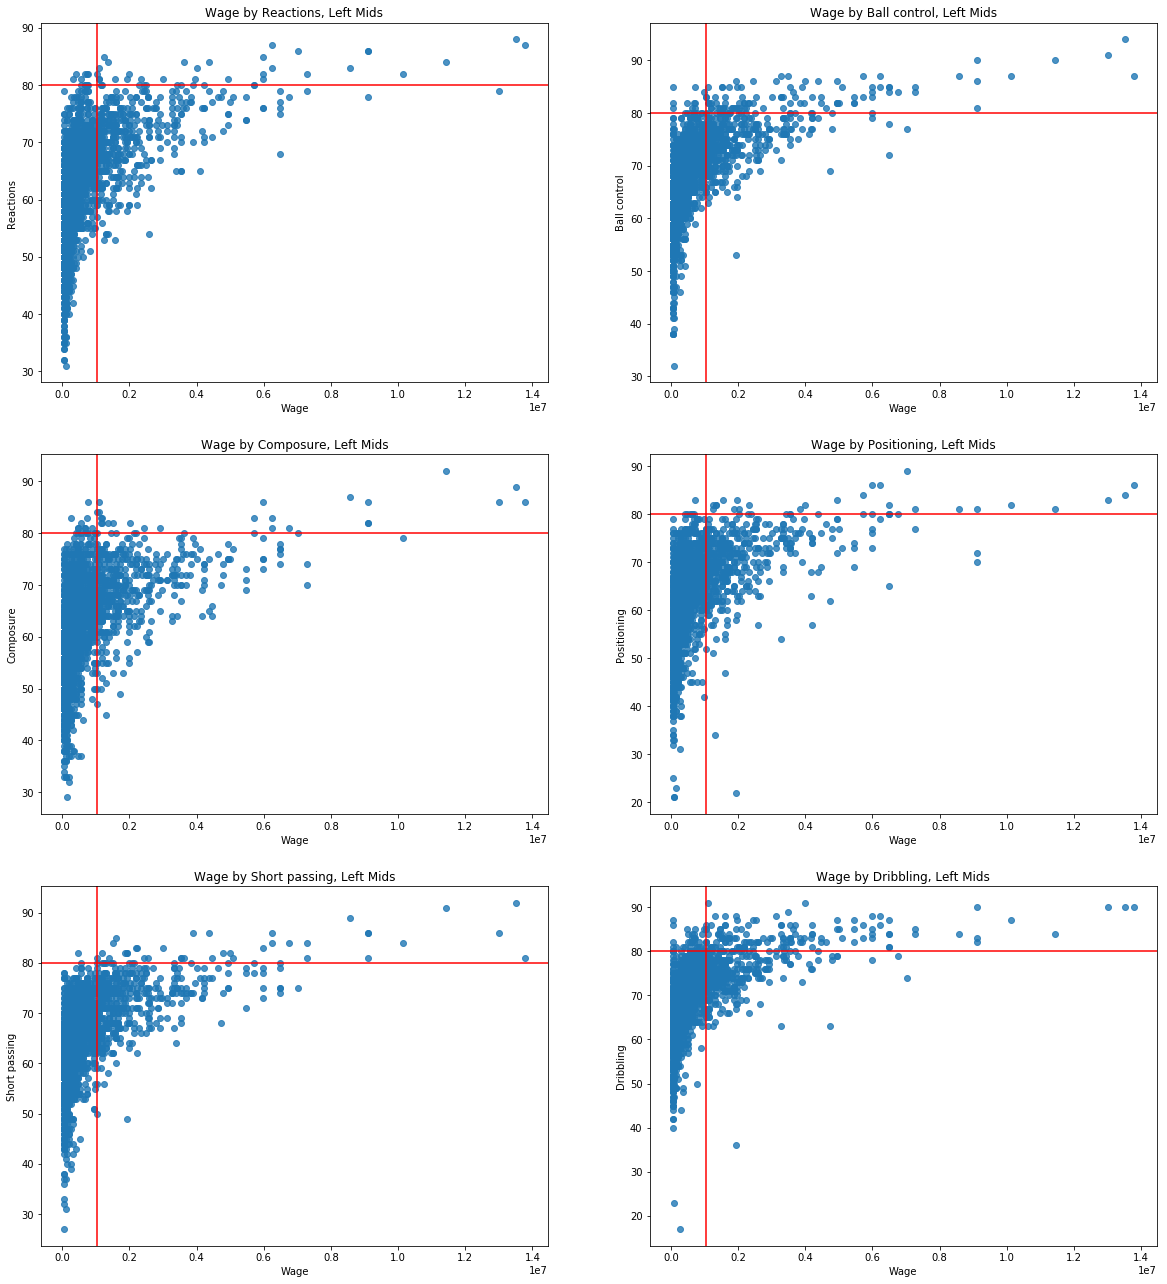

In [70]:
temp_df_2 = df[(df['PP_1'] == 'LM') | (df['PP_2'] == 'LM') | (df['PP_3'] == 'LM') | (df['PP_4'] == 'LM')]
regplot_subplots(temp_df_2, 'Wage', lm_pos_cor.index[1:7],
                supplementary_title=', Left Mids', x_line=1033333, y_line=80)

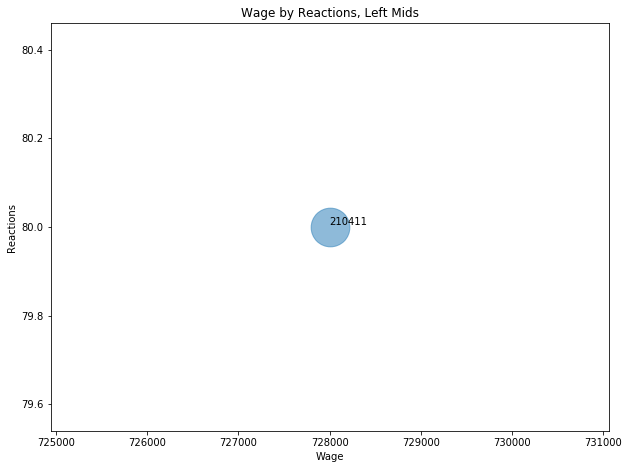

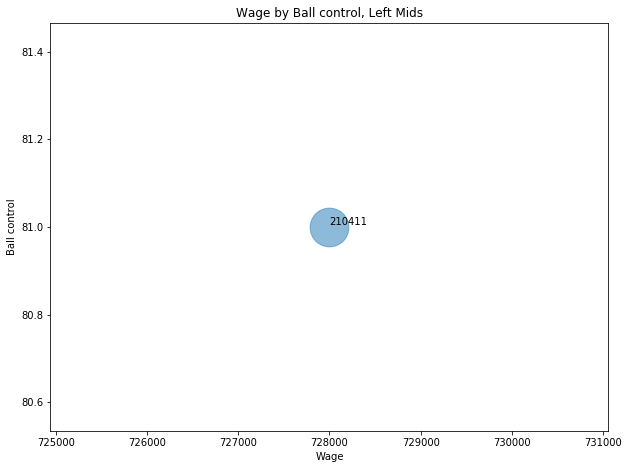

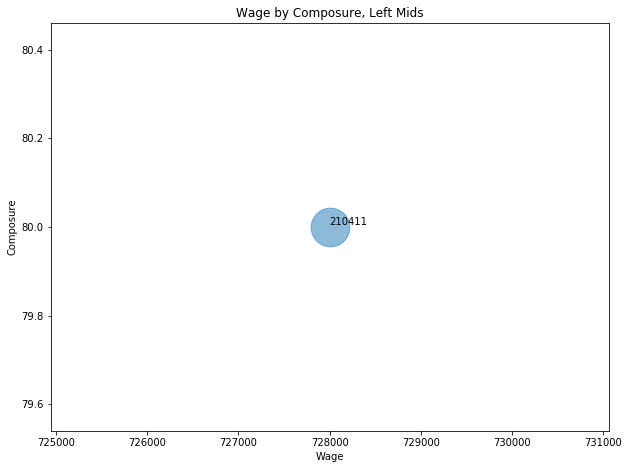

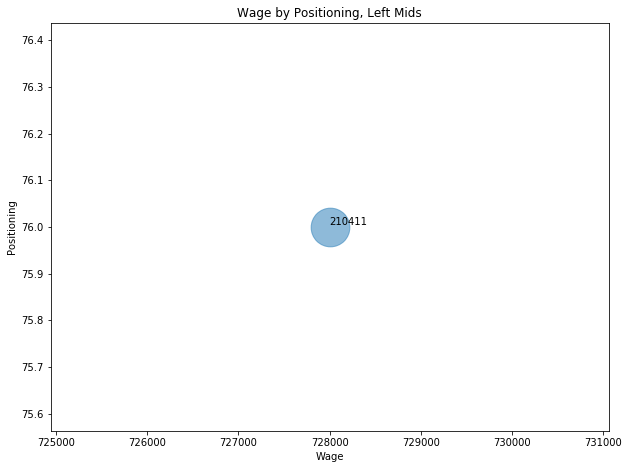

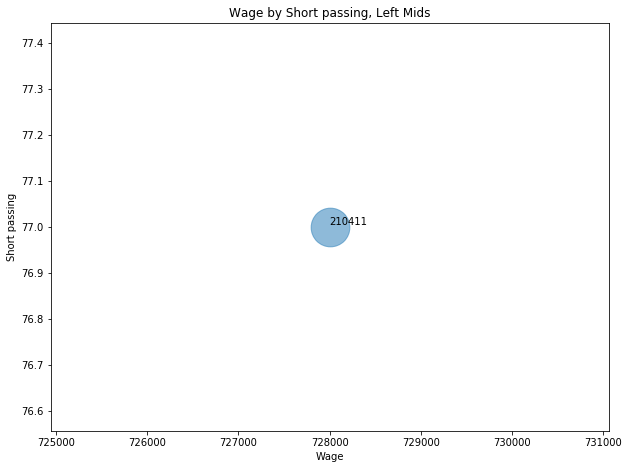

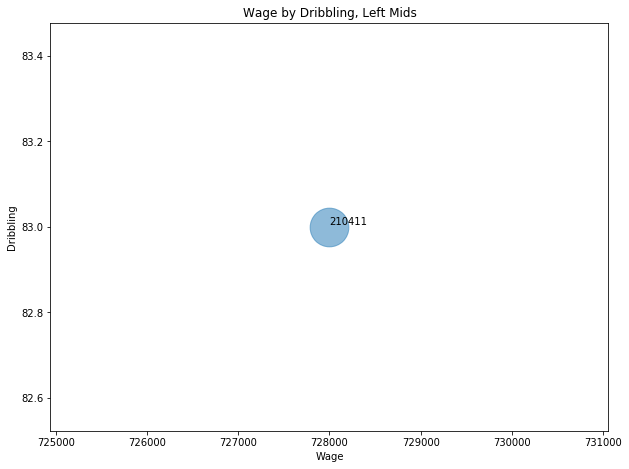

In [71]:
temp_df_3 = temp_df_2[(temp_df_2['Composure'] >= 80) & 
                (temp_df_2['Dribbling'] >= 80) &
                (temp_df_2['Positioning'] >= 75) &
                (temp_df_2['Ball control'] >= 80) &
                (temp_df_2['Short passing'] >= 75) &
                (temp_df_2['Age'] <= 26) &
                #(temp_df_2['Wage'] <= 3663636)]
                (temp_df_2['Wage'] <= 1033333)]
stack_annot_sp(temp_df_3, 'Wage', lm_pos_cor.index[1:7], rotation=0, supplementary_title=', Left Mids')

In [72]:
df.loc[[165239, 184144, 198164]]

Name  Age Nationality  Overall  Potential             Club  \
ID                                                                             
165239        S. Nasri   30      France       82         82      Antalyaspor   
184144       N. Gaitán   29   Argentina       83         83  Atlético Madrid   
198164  Jonathan Viera   27       Spain       82         82    UD Las Palmas   

             Value       Wage  Acceleration  Aggression  ...   Vision  \
ID                                                       ...            
165239  21000000.0  1508000.0          78.0        33.0  ...     81.0   
184144  25500000.0  3640000.0          84.0        57.0  ...     82.0   
198164  23000000.0  1612000.0          86.0        56.0  ...     87.0   

        Volleys  Preferred Positions  Primary position  Position type  \
ID                                                                      
165239     72.0             RM CM LM                RM              M   
184144     81.0                   LM                LM              M   
198164     57.0            CAM LM CM               CAM              M   

        Player type  PP_1  PP_2  PP_3  PP_4  
ID                                           
165239            M    RM    CM    LM   N/A  
184144            M    LM   N/A   N/A   N/A  
198164            O   CAM    LM    CM   N/A  

[3 rows x 50 columns]

# CHOSEN LEFT MIDS
* 184144
* SUB (198164)
* RES (210411)

In [73]:
starting_roster = starting_roster.append(df.loc[184144])
sub_roster = sub_roster.append(df.loc[198164])
reserve_roster = reserve_roster.append(df.loc[210411])

# CENTER MIDS

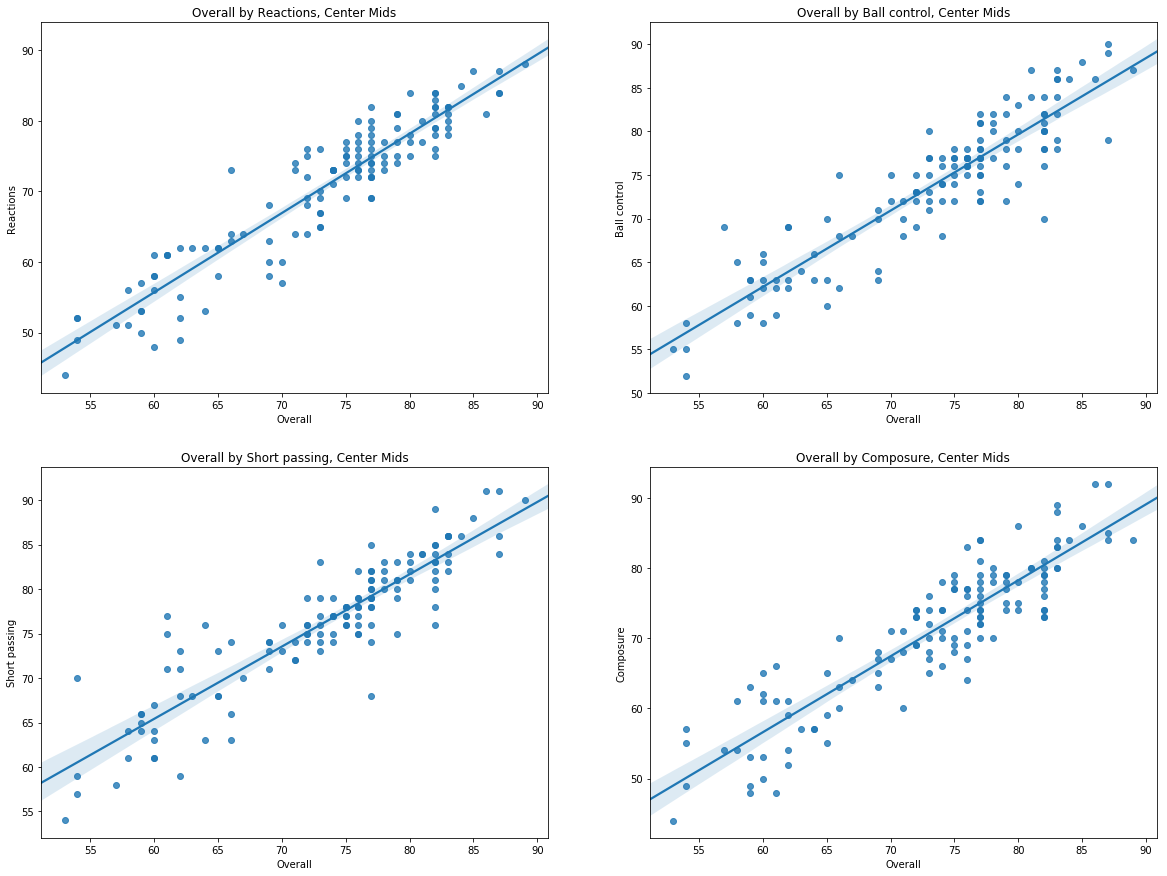

In [74]:
cm_pos_cor = pl_df[(pl_df['PP_1'] == 'CM') | (pl_df['PP_2'] == 'CM') | (pl_df['PP_3'] == 'CM') | (pl_df['PP_4'] == 'CM')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'CM') | (pl_df['PP_2'] == 'CM') | (pl_df['PP_3'] == 'CM') | (pl_df['PP_4'] == 'CM')]
regplot_subplots(temp_df_1, 'Overall', cm_pos_cor.index[1:5],
                supplementary_title=', Center Mids', fit_reg=True)

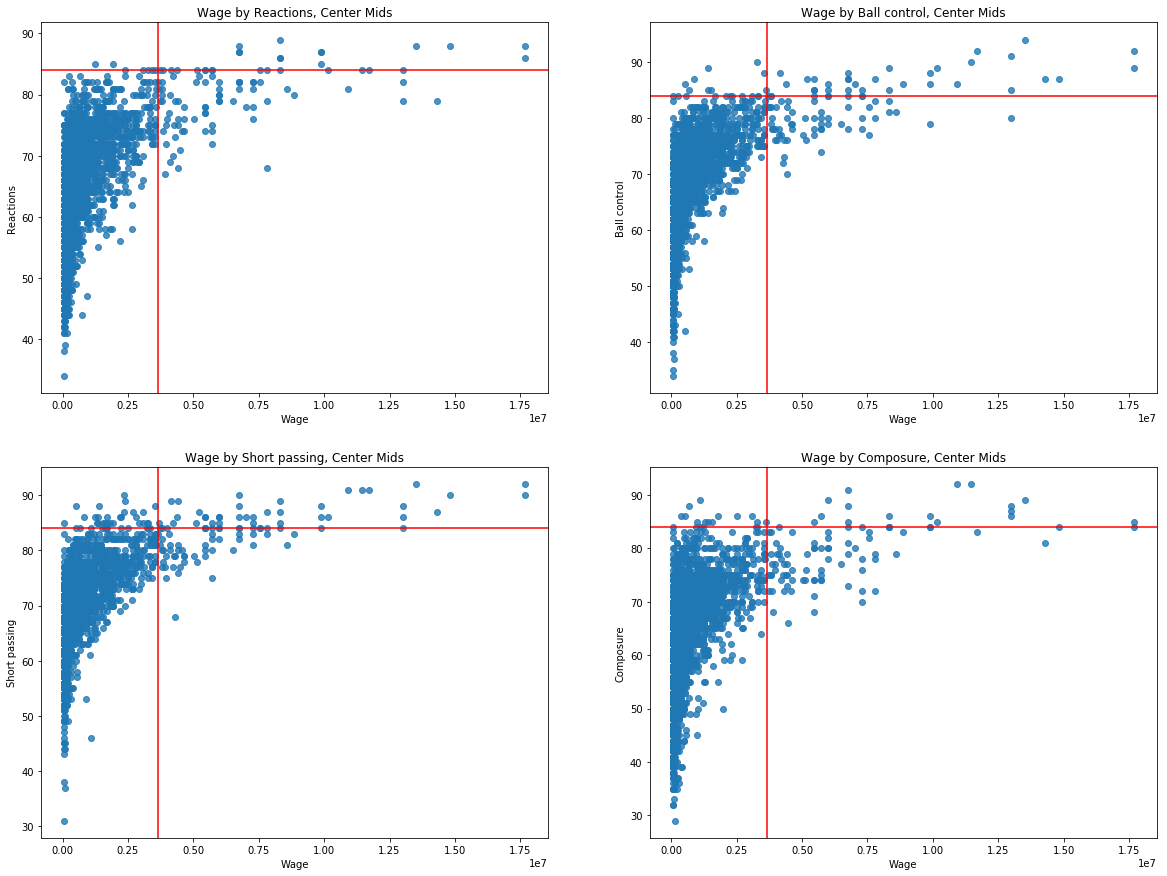

In [75]:
temp_df_2 = df[(df['PP_1'] == 'CM') | (df['PP_2'] == 'CM') | (df['PP_3'] == 'CM') | (df['PP_4'] == 'CM')]
regplot_subplots(temp_df_2, 'Wage', cm_pos_cor.index[1:5],
                supplementary_title=', Center Mids', x_line=3663636, y_line=84)

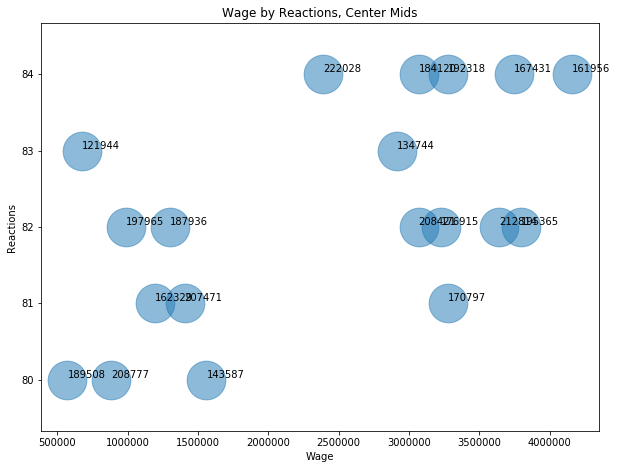

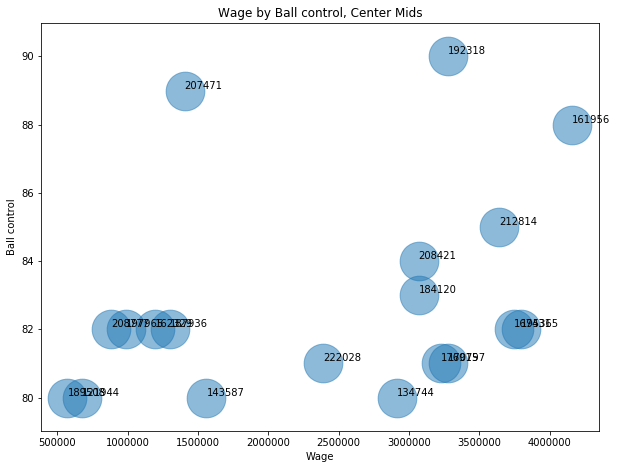

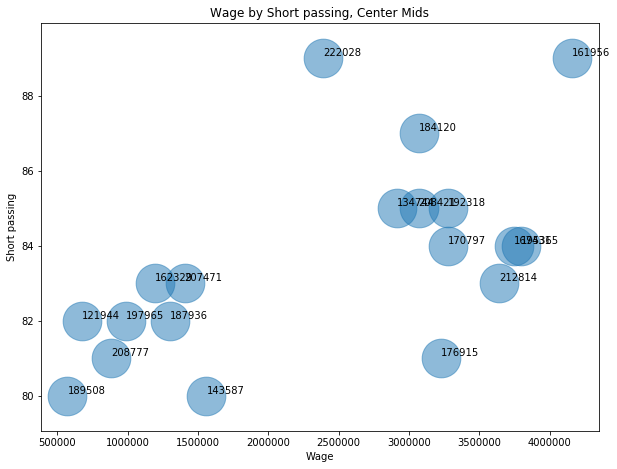

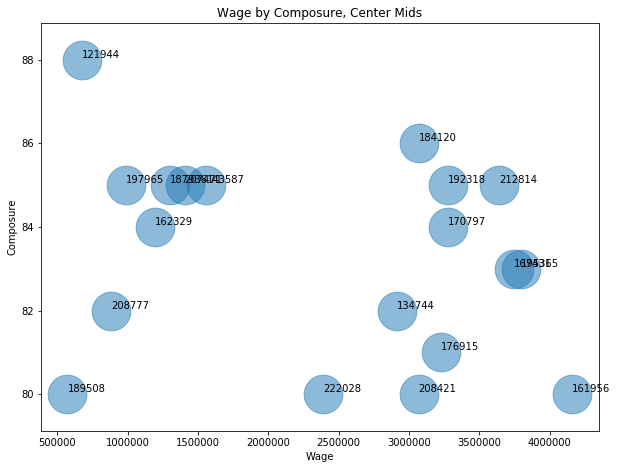

In [76]:
temp_df_3 = temp_df_2[(temp_df_2['Reactions'] >= 80) & 
                (temp_df_2['Ball control'] >= 80) &
                (temp_df_2['Composure'] >= 80) &
                (temp_df_2['Short passing'] >= 80) &
                #(temp_df_2['Age'] <= 30) &
                (temp_df_2['Wage'] <= 5000000)]
stack_annot_sp(temp_df_3, 'Wage', cm_pos_cor.index[1:5], rotation=0, supplementary_title=', Center Mids')

# CHOSEN CENTER MIDS
* 184120
* 161956
* RES (203895)
* RES (208777)

In [77]:
df.loc[[161956, 184120, 192318]]

Name  Age Nationality  Overall  Potential               Club  \
ID                                                                             
161956  Borja Valero   32       Spain       83         83              Inter   
184120         Bruno   33       Spain       84         84      Villarreal CF   
192318      M. Götze   25     Germany       81         85  Borussia Dortmund   

             Value       Wage  Acceleration  Aggression  ...   Vision  \
ID                                                       ...            
161956  20000000.0  4160000.0          73.0        52.0  ...     86.0   
184120  18500000.0  3068000.0          42.0        79.0  ...     83.0   
192318  22500000.0  3276000.0          71.0        48.0  ...     82.0   

        Volleys  Preferred Positions  Primary position  Position type  \
ID                                                                      
161956     70.0            CF CM CAM                CF              F   
184120     48.0               CDM CM               CDM              M   
192318     87.0               CAM CM               CAM              M   

        Player type  PP_1  PP_2  PP_3  PP_4  
ID                                           
161956            O    CF    CM   CAM   N/A  
184120            D   CDM    CM   N/A   N/A  
192318            O   CAM    CM   N/A   N/A  

[3 rows x 50 columns]

In [78]:
starting_roster = starting_roster.append(df.loc[184120])
starting_roster = starting_roster.append(df.loc[161956])
reserve_roster = reserve_roster.append(df.loc[203895])
reserve_roster = reserve_roster.append(df.loc[208777])

# CENTER BACKS

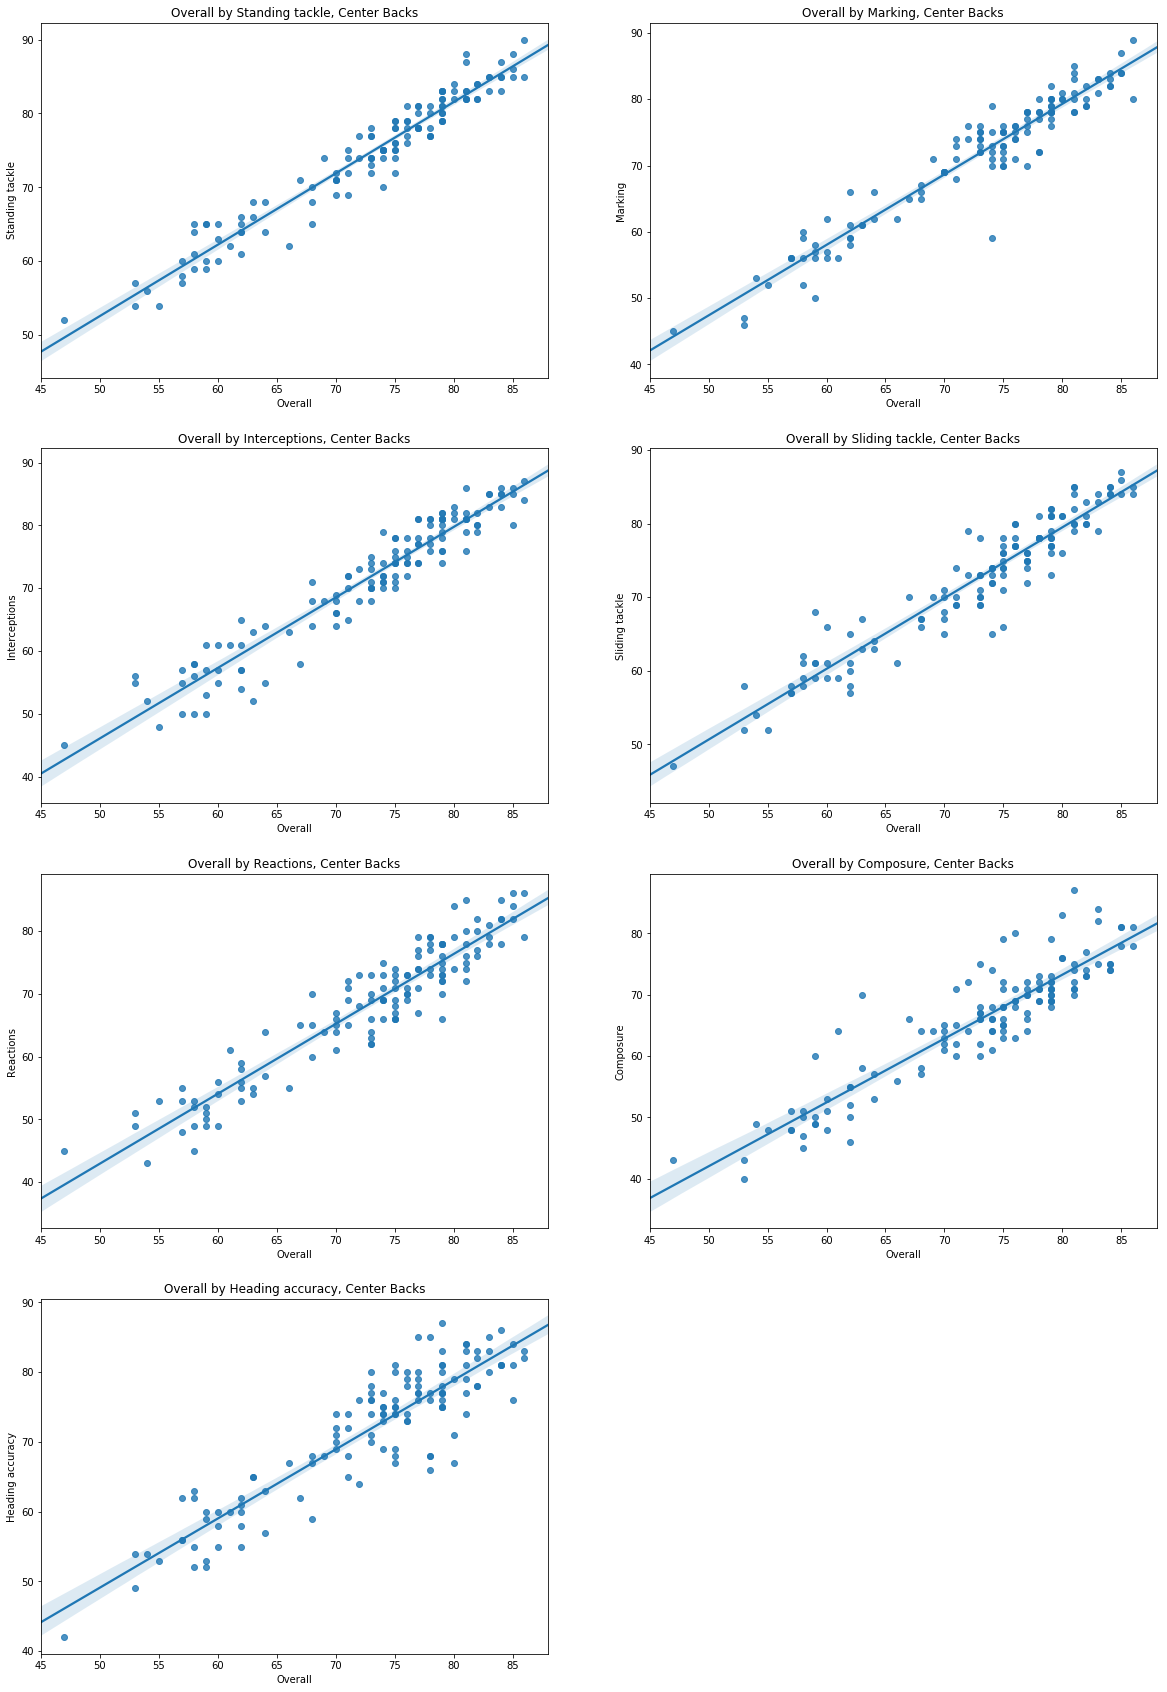

In [79]:
cb_pos_cor = pl_df[(pl_df['PP_1'] == 'CB') | (pl_df['PP_2'] == 'CB') | (pl_df['PP_3'] == 'CB') | (pl_df['PP_4'] == 'CB')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'CB') | (pl_df['PP_2'] == 'CB') | (pl_df['PP_3'] == 'CB') | (pl_df['PP_4'] == 'CB')]
regplot_subplots(temp_df_1, 'Overall', cb_pos_cor.index[1:8],
                supplementary_title=', Center Backs', fit_reg=True)

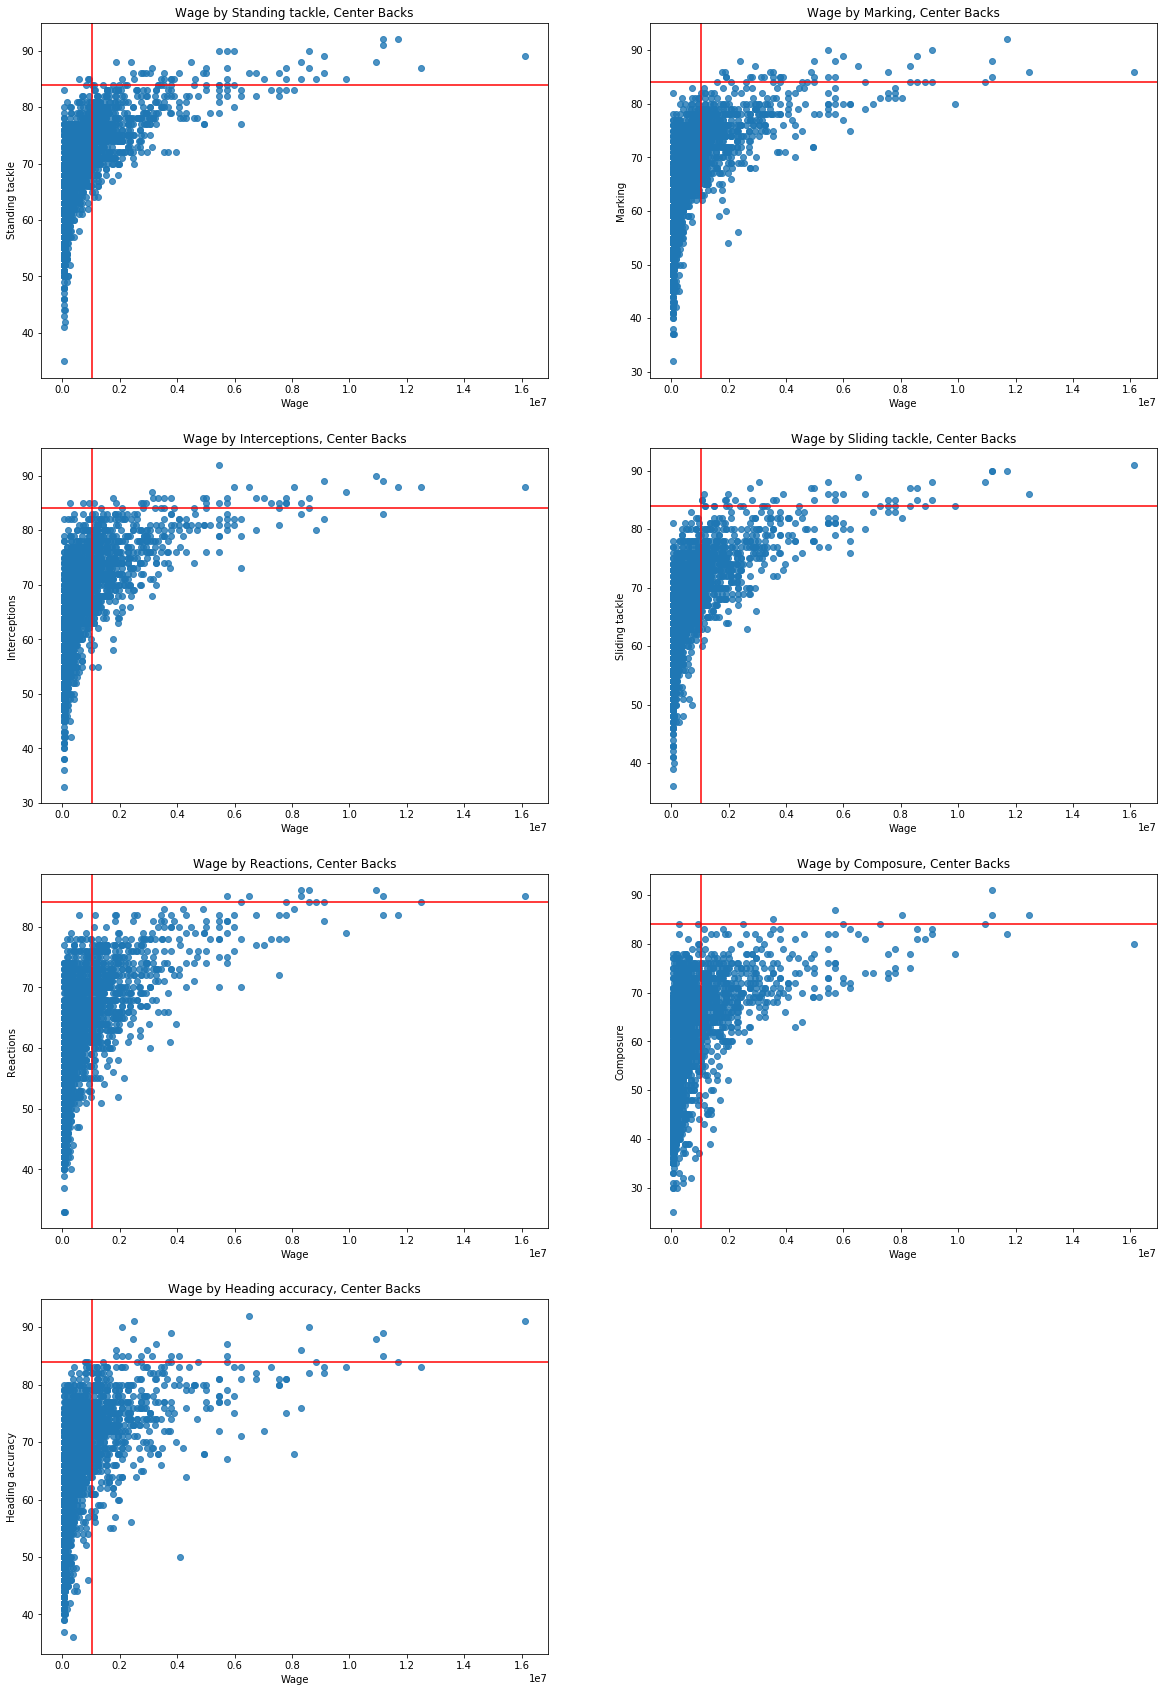

In [80]:
temp_df_2 = df[(df['PP_1'] == 'CB') | (df['PP_2'] == 'CB') | (df['PP_3'] == 'CB') | (df['PP_4'] == 'CB')]
regplot_subplots(temp_df_2, 'Wage', cb_pos_cor.index[1:8],
                supplementary_title=', Center Backs', x_line=1033333, y_line=84)

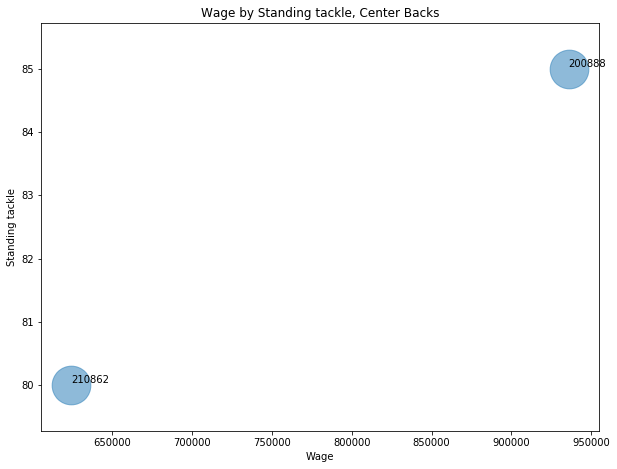

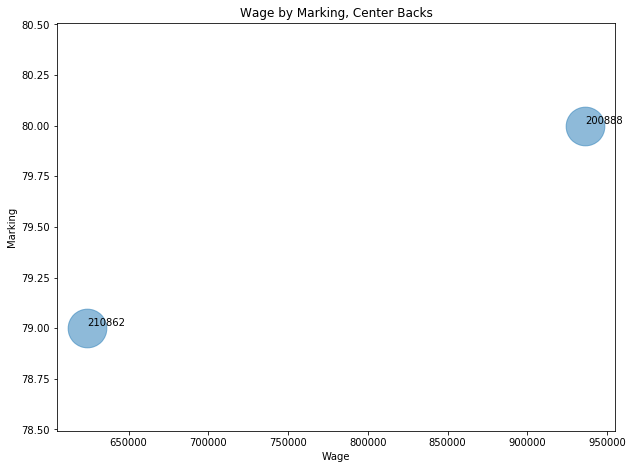

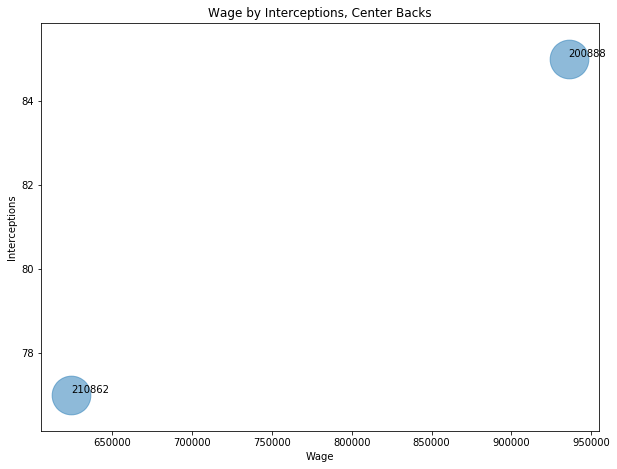

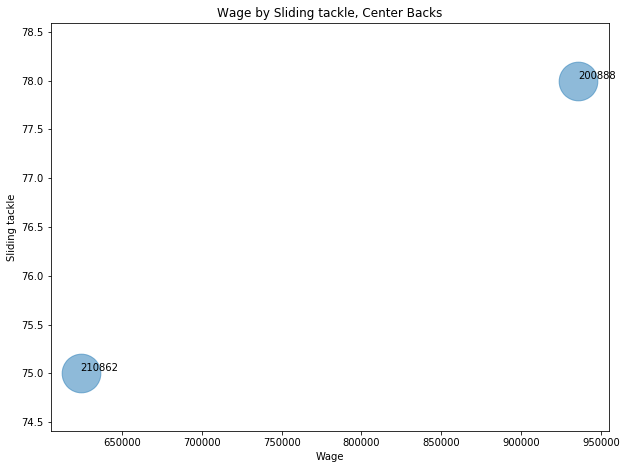

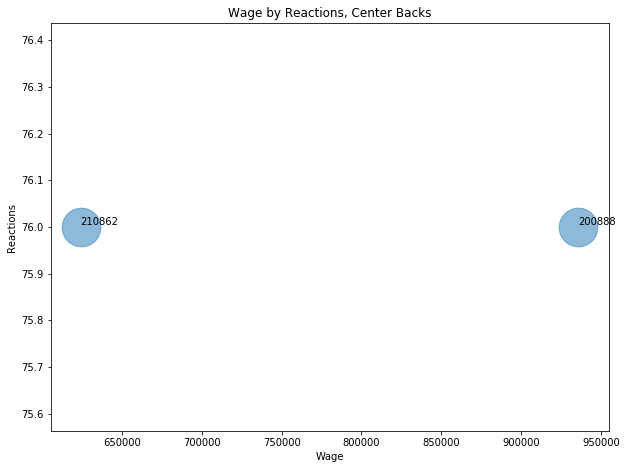

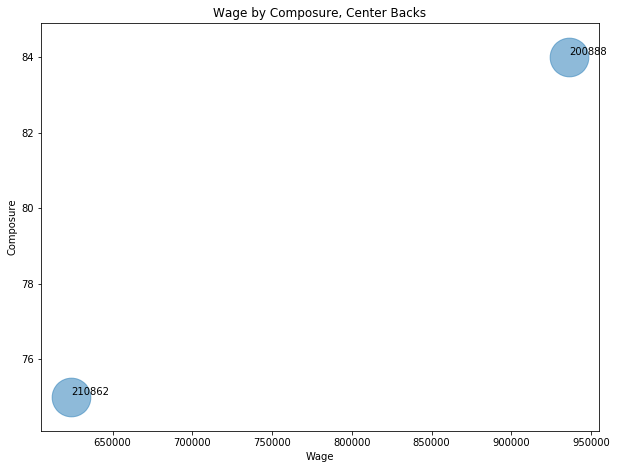

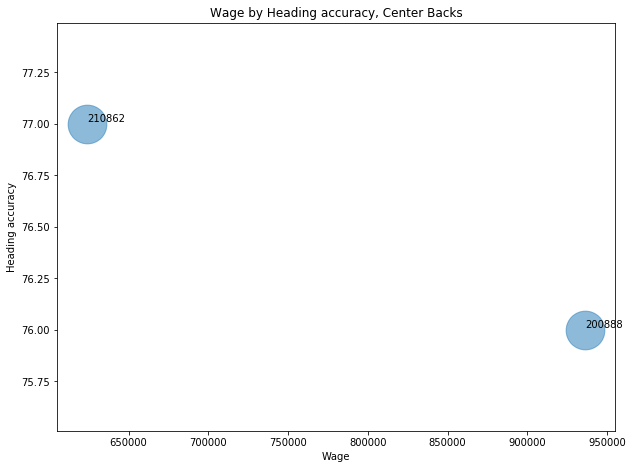

In [81]:
temp_df_3 = temp_df_2[(temp_df_2['Standing tackle'] >= 75) & 
                (temp_df_2['Marking'] >= 75) &
                (temp_df_2['Interceptions'] >= 75) &
                (temp_df_2['Sliding tackle'] >= 75) &
                (temp_df_2['Reactions'] >= 75) &
                (temp_df_2['Composure'] >= 75) &
                (temp_df_2['Heading accuracy'] >= 75) &
                (temp_df_2['Age'] <= 26) &
                (temp_df_2['Wage'] <= 1033333)]
                #(temp_df_2['Wage'] <= 3663636)]
stack_annot_sp(temp_df_3, 'Wage', cb_pos_cor.index[1:8], rotation=0, supplementary_title=', Center Backs')

In [82]:
df.loc[[182493, 159147, 171919]]

Name  Age Nationality  Overall  Potential              Club  \
ID                                                                         
182493   D. Godín   31     Uruguay       88         88   Atlético Madrid   
159147  L. Perrin   31      France       83         83  AS Saint-Étienne   
171919      Naldo   34      Brazil       82         82     FC Schalke 04   

             Value       Wage  Acceleration  Aggression  ...   Vision  \
ID                                                       ...            
182493  40000000.0  6500000.0          62.0        86.0  ...     52.0   
159147  17500000.0  2392000.0          67.0        81.0  ...     63.0   
171919   6500000.0  2496000.0          67.0        71.0  ...     59.0   

        Volleys  Preferred Positions  Primary position  Position type  \
ID                                                                      
182493     47.0                   CB                CB              D   
159147     44.0                   CB                CB              D   
171919     60.0                   CB                CB              D   

        Player type  PP_1  PP_2  PP_3  PP_4  
ID                                           
182493            D    CB   N/A   N/A   N/A  
159147            D    CB   N/A   N/A   N/A  
171919            D    CB   N/A   N/A   N/A  

[3 rows x 50 columns]

# CHOSEN CENTER BACKS
* 182493
* 159147
* SUB (171919)
* RES (200888)
* RES (210862)

In [83]:
starting_roster = starting_roster.append(df.loc[159147])
starting_roster = starting_roster.append(df.loc[182493])
sub_roster = sub_roster.append(df.loc[171919])
reserve_roster = reserve_roster.append(df.loc[200888])
reserve_roster = reserve_roster.append(df.loc[210862])

# Right Backs

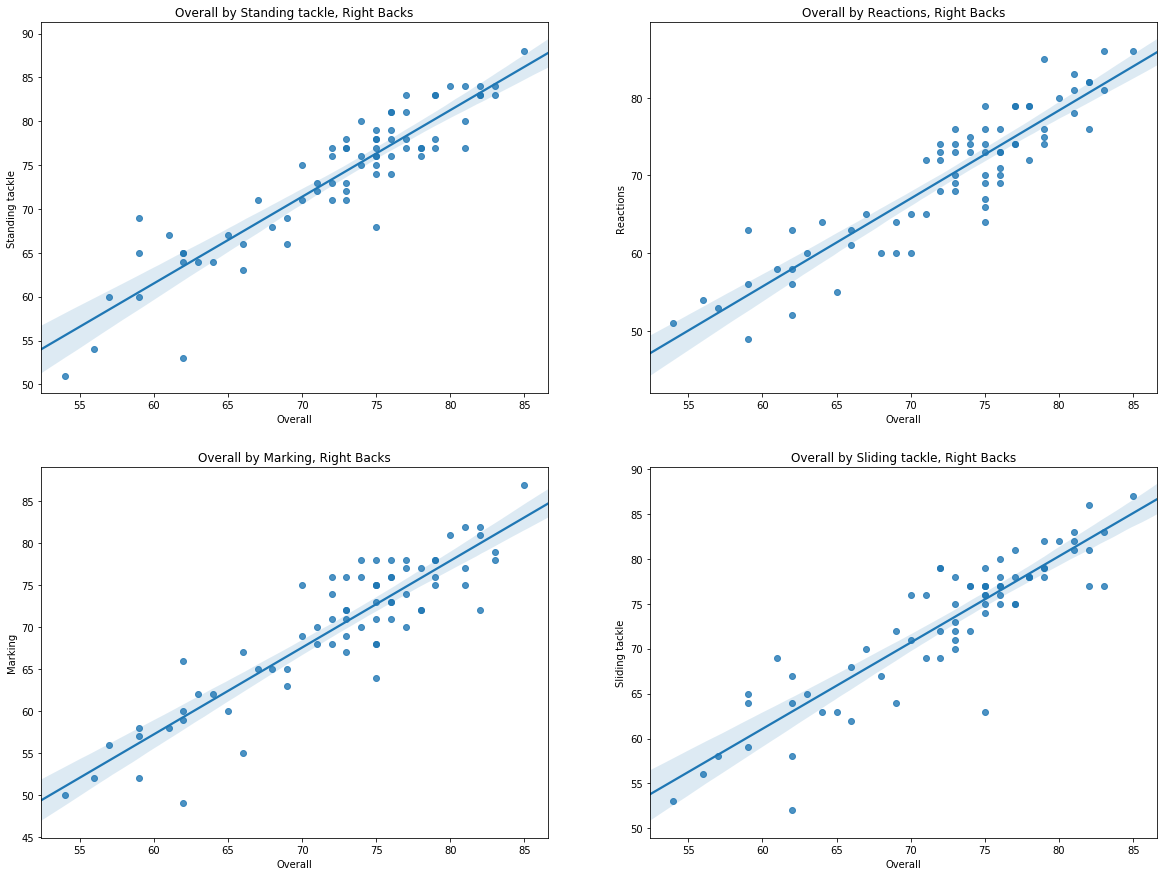

In [84]:
rb_pos_cor = pl_df[(pl_df['PP_1'] == 'RB') | (pl_df['PP_2'] == 'RB') | (pl_df['PP_3'] == 'RB') | (pl_df['PP_4'] == 'RB')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'RB') | (pl_df['PP_2'] == 'RB') | (pl_df['PP_3'] == 'RB') | (pl_df['PP_4'] == 'RB')]
regplot_subplots(temp_df_1, 'Overall', rb_pos_cor.index[1:5],
                supplementary_title=', Right Backs', fit_reg=True)

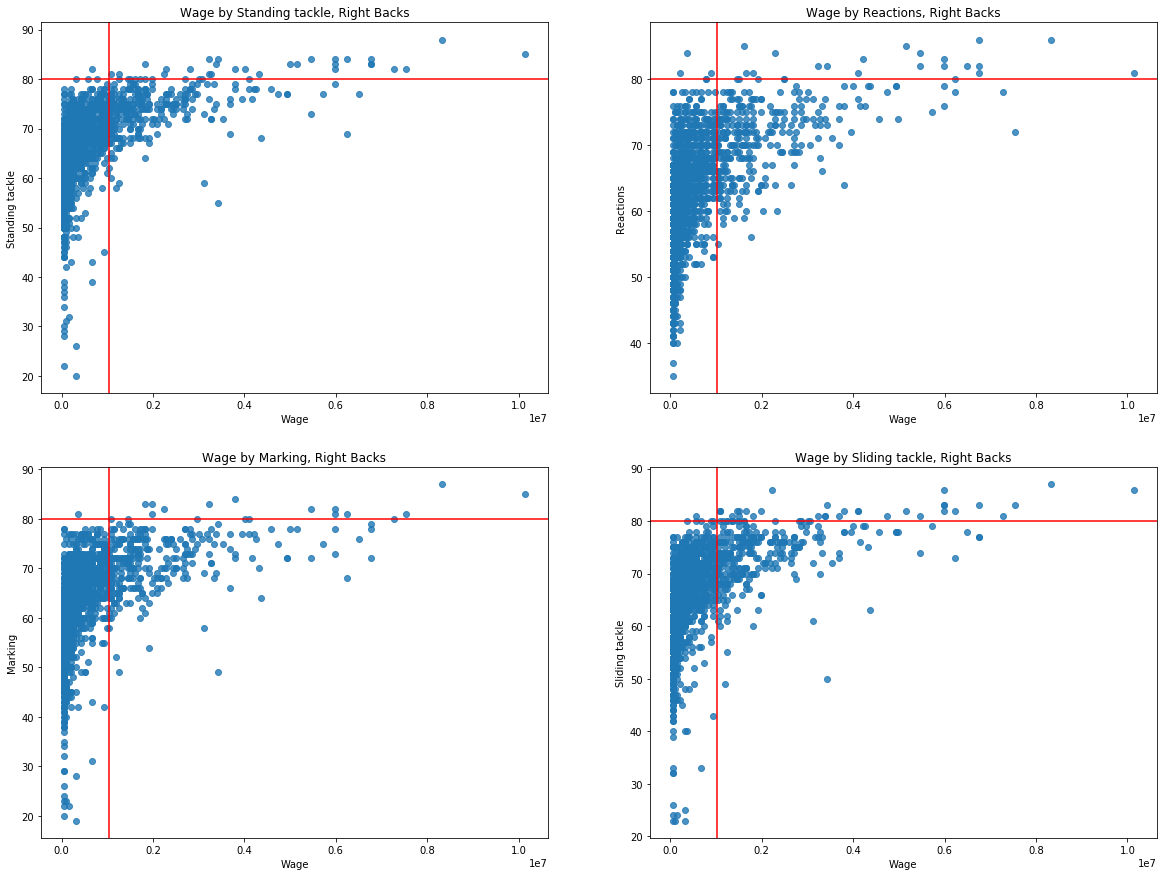

In [85]:
temp_df_2 = df[(df['PP_1'] == 'RB') | (df['PP_2'] == 'RB') | (df['PP_3'] == 'RB') | (df['PP_4'] == 'RB')]
regplot_subplots(temp_df_2, 'Wage', rb_pos_cor.index[1:5],
                supplementary_title=', Right Backs', x_line=1033333, y_line=80)

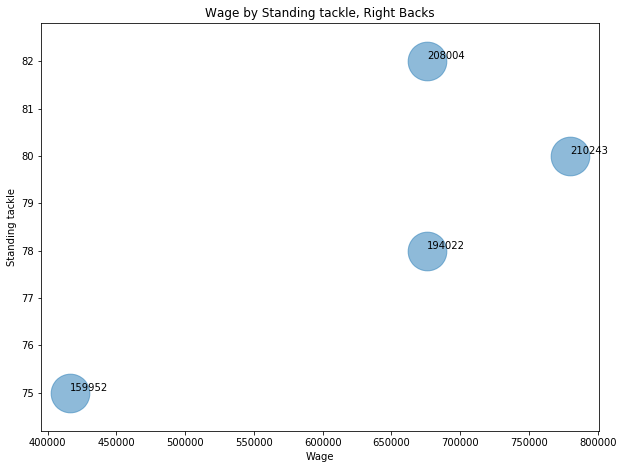

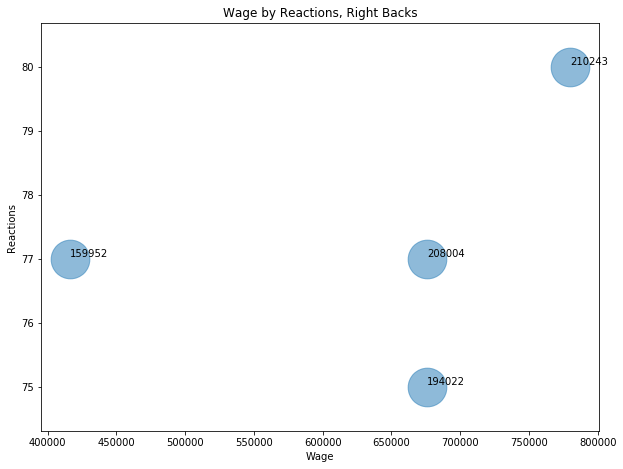

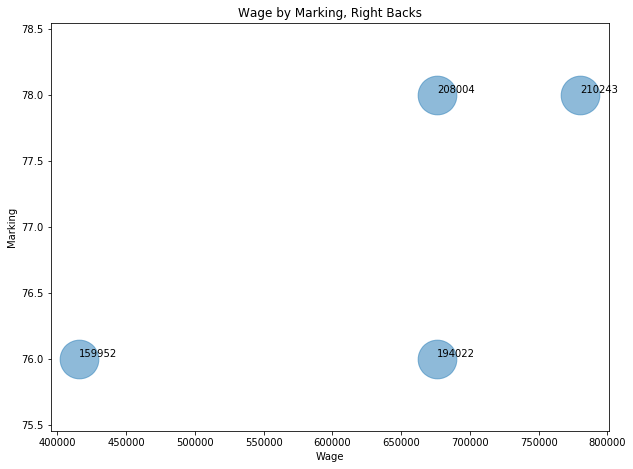

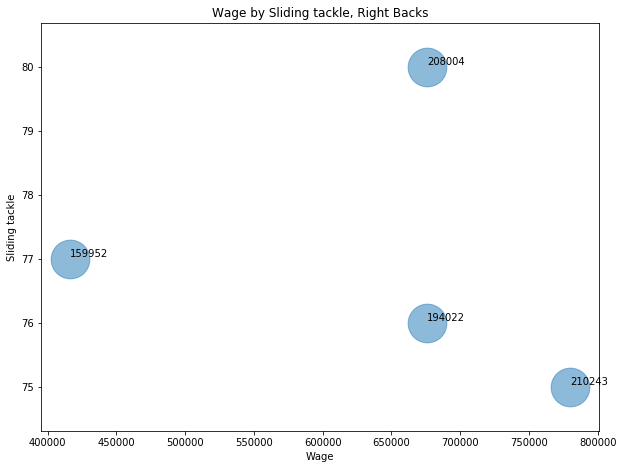

In [86]:
temp_df_3 = temp_df_2[(temp_df_2['Standing tackle'] >= 75) & 
                (temp_df_2['Marking'] >= 75) &
                (temp_df_2['Reactions'] >= 75) &
                (temp_df_2['Sliding tackle'] >= 75) &
                (temp_df_2['Age'] <= 26) &
                (temp_df_2['Wage'] <= 1033333)]
stack_annot_sp(temp_df_3, 'Wage', rb_pos_cor.index[1:5], rotation=0, supplementary_title=', Right Backs')

# CHOSEN RIGHT BACKS
* 146760
* SUB (190520)
* RES (208004)

In [87]:
starting_roster = starting_roster.append(df.loc[146760])
sub_roster = sub_roster.append(df.loc[190520])
reserve_roster = reserve_roster.append(df.loc[208004])

# Left Backs

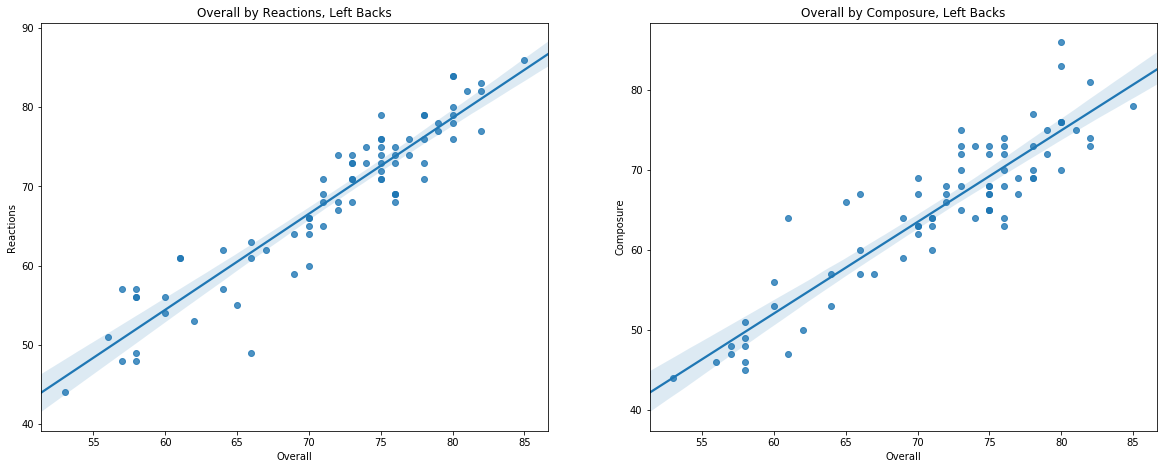

In [88]:
lb_pos_cor = pl_df[(pl_df['PP_1'] == 'LB') | (pl_df['PP_2'] == 'LB') | (pl_df['PP_3'] == 'LB') | (pl_df['PP_4'] == 'LB')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'LB') | (pl_df['PP_2'] == 'LB') | (pl_df['PP_3'] == 'LB') | (pl_df['PP_4'] == 'LB')]
regplot_subplots(temp_df_1, 'Overall', lb_pos_cor.index[1:3],
                supplementary_title=', Left Backs', fit_reg=True)

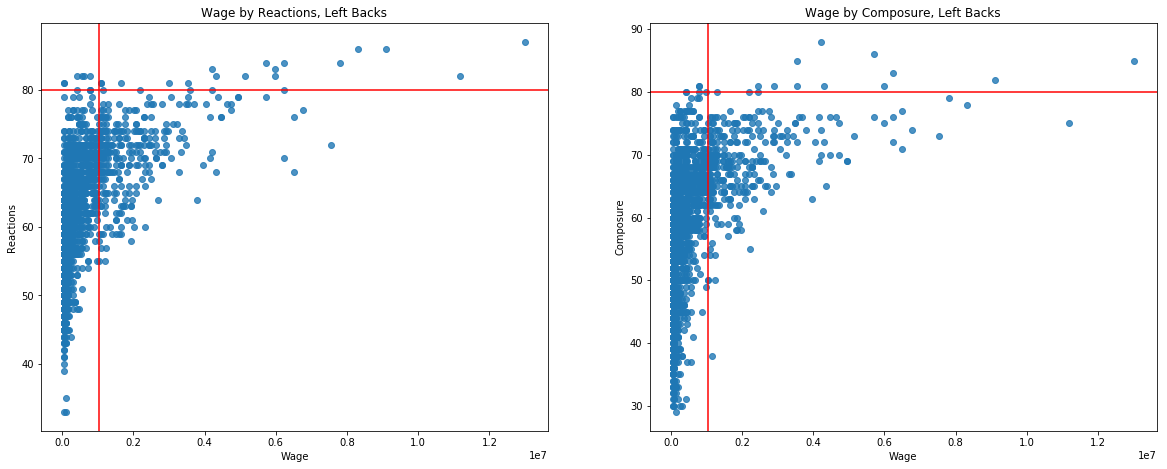

In [89]:
temp_df_2 = df[(df['PP_1'] == 'LB') | (df['PP_2'] == 'LB') | (df['PP_3'] == 'LB') | (df['PP_4'] == 'LB')]
regplot_subplots(temp_df_2, 'Wage', lb_pos_cor.index[1:3],
                supplementary_title=', Left Backs', x_line=1033333, y_line=80)

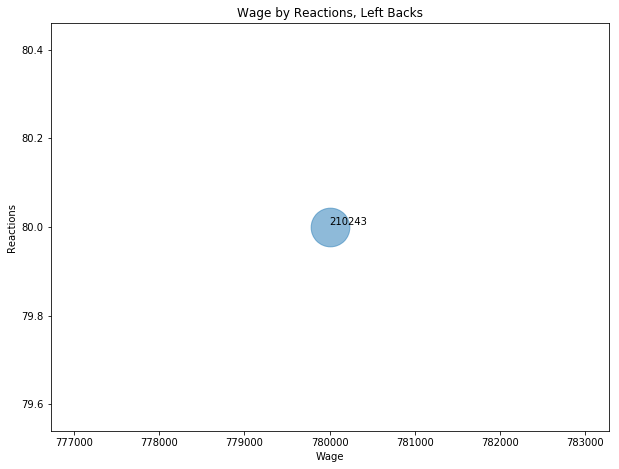

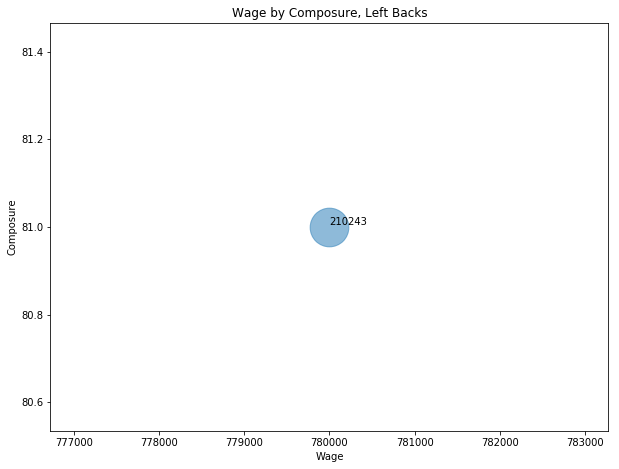

In [90]:
temp_df_3 = temp_df_2[(temp_df_2['Reactions'] >= 80) & 
                (temp_df_2['Composure'] >= 80) &
                (temp_df_2['Age'] <= 26) &
                (temp_df_2['Wage'] <= 1033333)]
stack_annot_sp(temp_df_3, 'Wage', lb_pos_cor.index[1:3], rotation=0, supplementary_title=', Left Backs')

# CHOSEN LEFT BACKS
* 185103
* SUB (160027)
* RES (210243)

In [91]:
starting_roster = starting_roster.append(df.loc[185103])
sub_roster = sub_roster.append(df.loc[160027])
reserve_roster = reserve_roster.append(df.loc[210243])

# Goalies

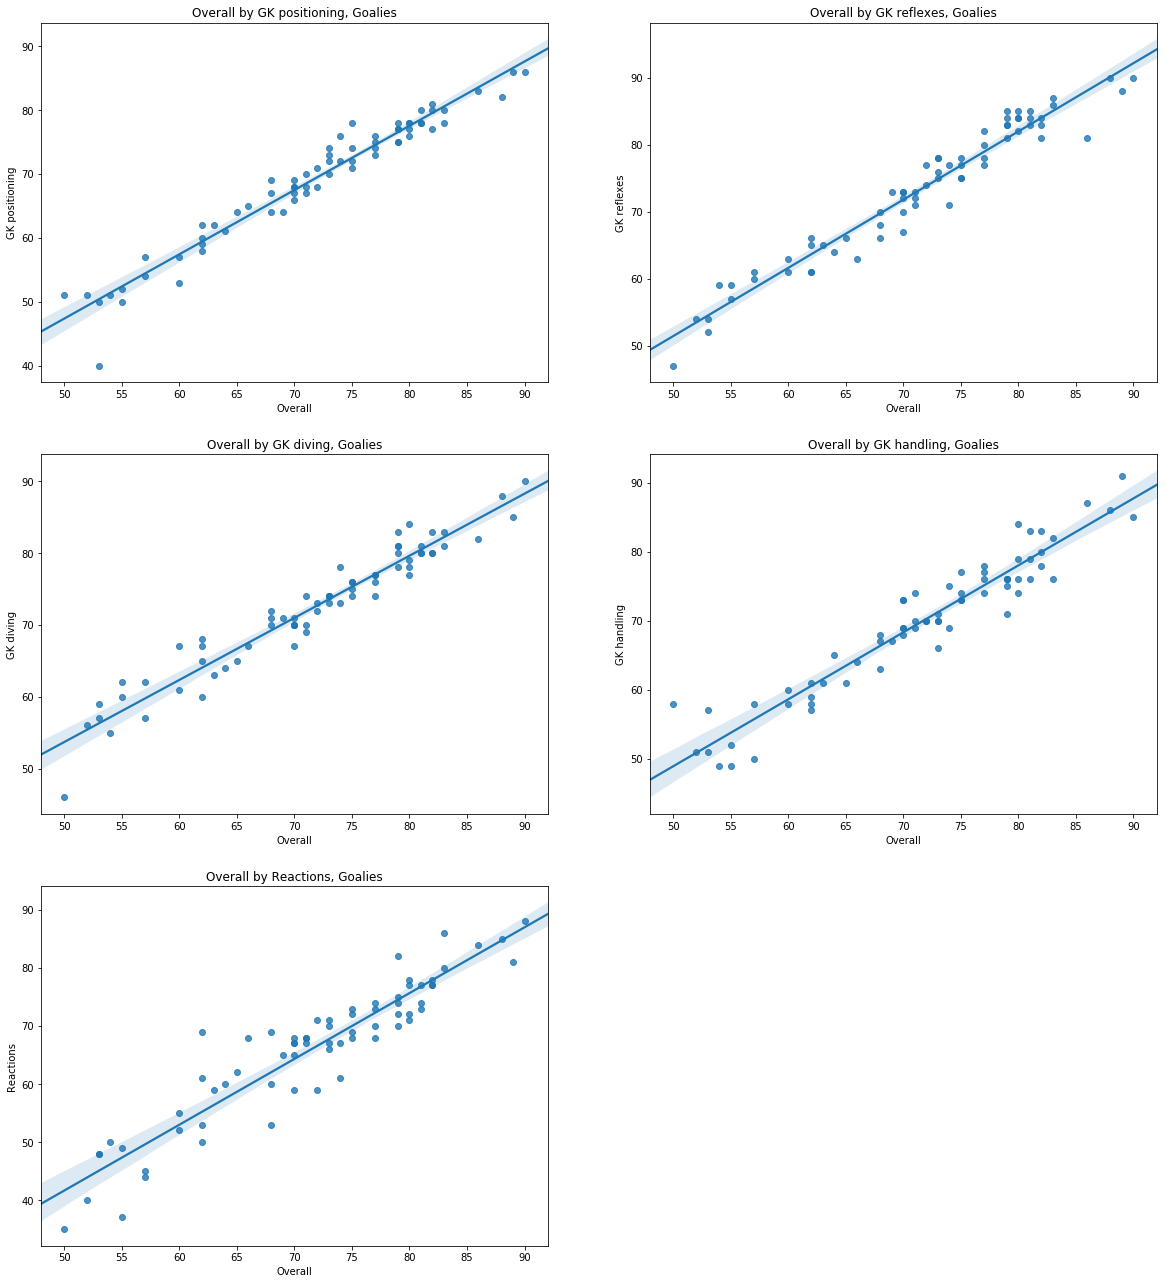

In [92]:
gk_pos_cor = pl_df[(pl_df['PP_1'] == 'GK') | (pl_df['PP_2'] == 'GK') | (pl_df['PP_3'] == 'GK') | (pl_df['PP_4'] == 'GK')].corr()['Overall'].sort_values(ascending=False)
temp_df_1 = pl_df[(pl_df['PP_1'] == 'GK') | (pl_df['PP_2'] == 'GK') | (pl_df['PP_3'] == 'GK') | (pl_df['PP_4'] == 'GK')]
regplot_subplots(temp_df_1, 'Overall', gk_pos_cor.index[1:6],
                supplementary_title=', Goalies', fit_reg=True)

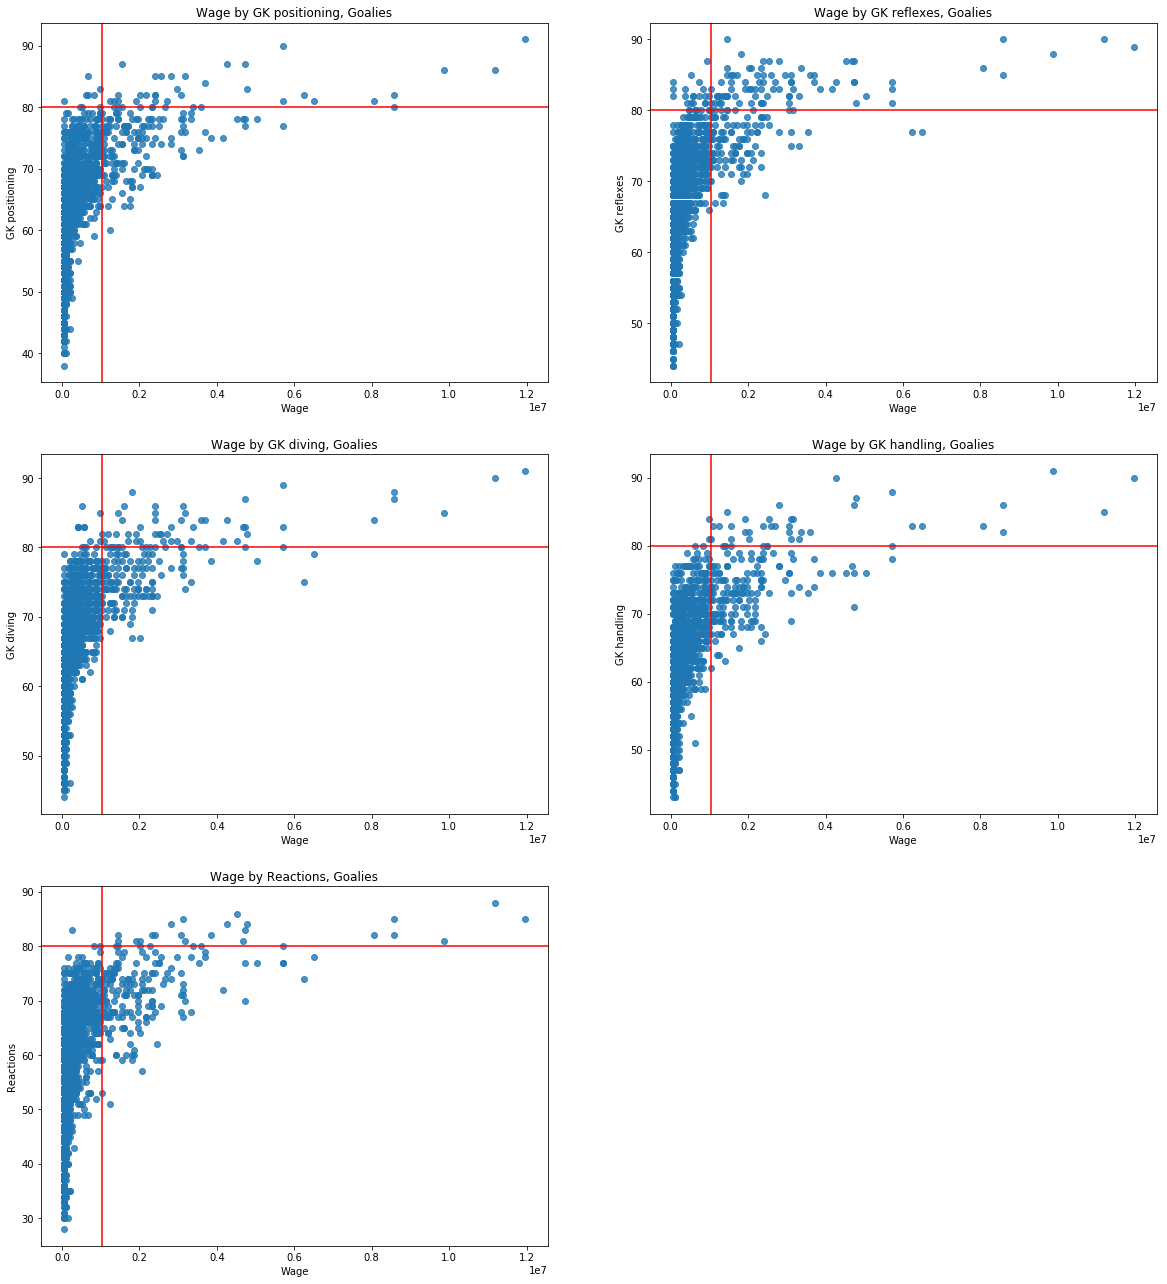

In [93]:
temp_df_2 = df[(df['PP_1'] == 'GK') | (df['PP_2'] == 'GK') | (df['PP_3'] == 'GK') | (df['PP_4'] == 'GK')]
regplot_subplots(temp_df_2, 'Wage', gk_pos_cor.index[1:6],
                supplementary_title=', Goalies', x_line=1033333, y_line=80)

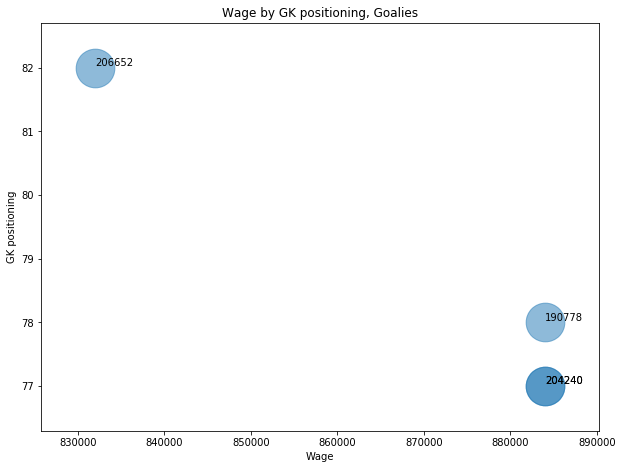

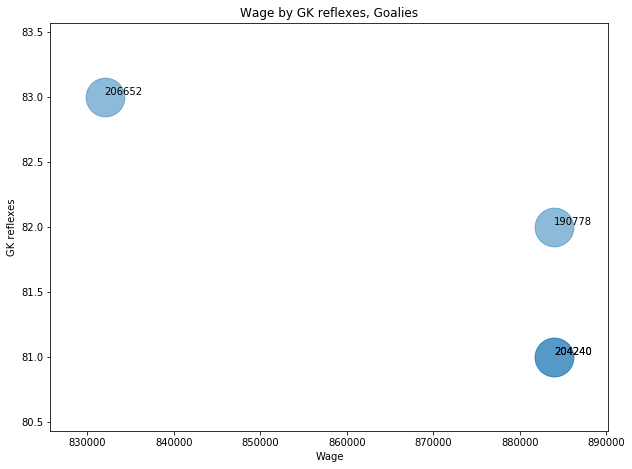

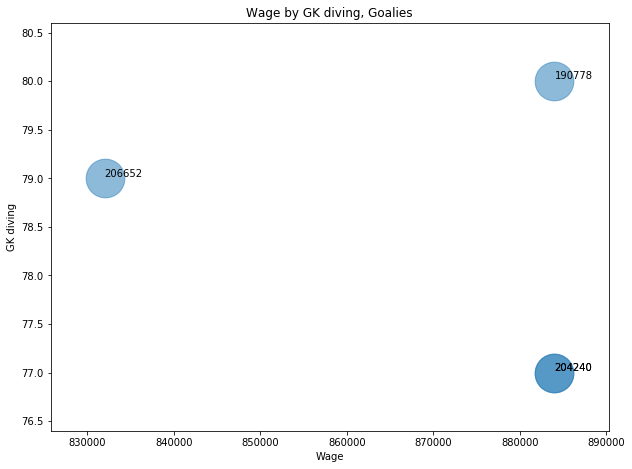

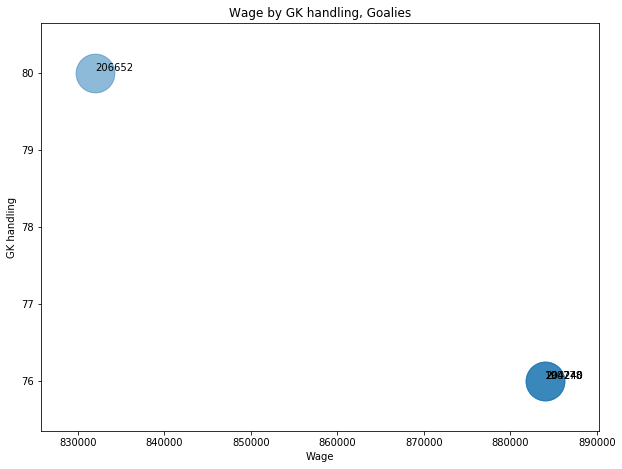

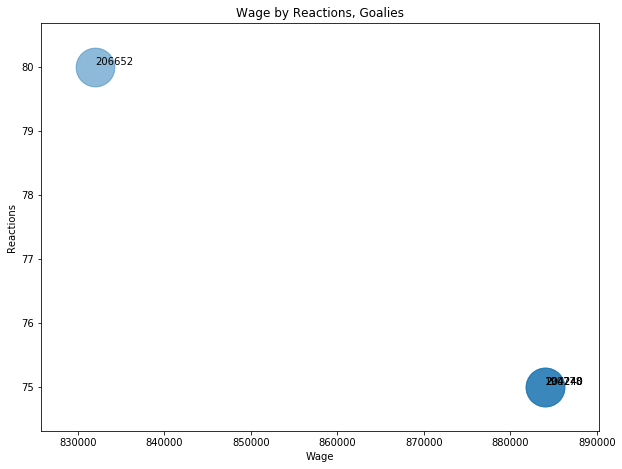

In [94]:
temp_df_3 = temp_df_2[(temp_df_2['GK positioning'] >= 75) & 
                (temp_df_2['GK reflexes'] >= 75) &
                (temp_df_2['GK diving'] >= 75) &
                (temp_df_2['GK handling'] >= 75) &
                (temp_df_2['Reactions'] >= 75) &
                (temp_df_2['Age'] <= 26) &
                (temp_df_2['Wage'] <= 1033333)]
stack_annot_sp(temp_df_3, 'Wage', gk_pos_cor.index[1:6], rotation=0, supplementary_title=', Goalies')

# CHOSEN GOALIES
* 179783
* SUB (200316)
* RES (206652)
* RES (190778) (?)

In [95]:
starting_roster = starting_roster.append(df.loc[179783])
sub_roster = sub_roster.append(df.loc[200316])
reserve_roster = reserve_roster.append(df.loc[206652])
#reserve_roster = reserve_roster.append(df.loc[190778])

# STARTING ROSTER

In [96]:
weird_duplicate = reserve_roster.loc[203895][:1]
reserve_roster = reserve_roster.drop(reserve_roster.index[5], axis=0)
reserve_roster = reserve_roster.append(weird_duplicate)
reserve_roster

Acceleration   Age  Aggression  Agility  Balance  Ball control  \
199737          78.0  26.0        59.0     73.0     68.0          78.0   
228687          73.0  19.0        44.0     75.0     70.0          79.0   
213432          70.0  26.0        48.0     74.0     68.0          76.0   
193165          87.0  24.0        45.0     90.0     87.0          84.0   
210411          77.0  22.0        73.0     90.0     85.0          81.0   
208777          75.0  22.0        58.0     85.0     81.0          82.0   
200888          67.0  25.0        88.0     58.0     60.0          77.0   
210862          54.0  24.0        76.0     51.0     49.0          64.0   
208004          63.0  25.0        81.0     67.0     68.0          71.0   
210243          89.0  23.0        75.0     84.0     78.0          78.0   
206652          50.0  23.0        27.0     62.0     43.0          12.0   
203895          62.0  25.0        52.0     76.0     82.0          82.0   

                    Club  Composure  Crossing  Curve    ...     Shot power  \
199737          SC Braga       76.0      77.0   82.0    ...           83.0   
228687              Ajax       80.0      42.0   67.0    ...           87.0   
213432  Shakhtar Donetsk       76.0      49.0   46.0    ...           75.0   
193165          FC Porto       85.0      73.0   85.0    ...           66.0   
210411          FC Porto       80.0      74.0   74.0    ...           67.0   
208777          FC Porto       82.0      72.0   77.0    ...           65.0   
200888          FC Porto       84.0      50.0   48.0    ...           77.0   
210862          SC Braga       75.0      29.0   32.0    ...           46.0   
208004              Ajax       74.0      70.0   40.0    ...           60.0   
210243          FC Porto       81.0      80.0   76.0    ...           67.0   
206652        Sevilla FC       29.0      17.0   24.0    ...           19.0   
203895          KRC Genk       82.0      64.0   77.0    ...           64.0   

        Sliding tackle  Sprint speed  Stamina  Standing tackle  Strength  \
199737            23.0          82.0     58.0             33.0      68.0   
228687            19.0          79.0     71.0             24.0      77.0   
213432            23.0          74.0     72.0             22.0      73.0   
193165            31.0          79.0     74.0             40.0      39.0   
210411            27.0          75.0     63.0             41.0      53.0   
208777            62.0          67.0     73.0             66.0      38.0   
200888            78.0          68.0     87.0             85.0      89.0   
210862            75.0          56.0     65.0             80.0      77.0   
208004            80.0          68.0     82.0             82.0      72.0   
210243            75.0          88.0     82.0             80.0      62.0   
206652            11.0          53.0     31.0             11.0      67.0   
203895            40.0          57.0     75.0             52.0      50.0   

             Value  Vision  Volleys      Wage  
199737   8500000.0    73.0     77.0  780000.0  
228687  16500000.0    69.0     75.0  520000.0  
213432   9500000.0    62.0     68.0   52000.0  
193165  23000000.0    77.0     75.0  884000.0  
210411  12000000.0    77.0     61.0  728000.0  
208777  17000000.0    81.0     60.0  884000.0  
200888  27500000.0    69.0     55.0  936000.0  
210862  10000000.0    33.0     34.0  624000.0  
208004   8500000.0    56.0     38.0  676000.0  
210243  17000000.0    75.0     53.0  780000.0  
206652  21500000.0    45.0     15.0  832000.0  
203895  13000000.0    83.0     62.0  988000.0  

[12 rows x 50 columns]

In [97]:
starting_roster['Selected Position'] = pd.Series(['ST', 'ST', 'RM', 'LM', 'CM', 'CM', 'CB', 'CB', 'RB', 'LB', 'GK'], 
                                                 index=starting_roster.index)
sub_roster['Selected Position'] = pd.Series(['ST', 'RM', 'LM', 'CB', 'RB', 'LB', 'GK'], index=sub_roster.index)
reserve_roster['Selected Position'] = pd.Series(['ST', 'ST', 'ST', 'RM', 'LM', 'CM', 'CB', 'CB', 'RB', 'LB', 'GK', 'CM'], 
                                                index=reserve_roster.index)

In [98]:
starting_roster[['Name', 'Overall', 'Age', 'Club', 'Nationality', 'Selected Position', 'Preferred Positions', 'Wage']]

Name  Overall   Age                    Club Nationality  \
176769         Jonas     83.0  33.0              SL Benfica      Brazil   
188350       M. Reus     86.0  28.0       Borussia Dortmund     Germany   
204970    F. Thauvin     82.0  24.0  Olympique de Marseille      France   
184144     N. Gaitán     83.0  29.0         Atlético Madrid   Argentina   
184120         Bruno     84.0  33.0           Villarreal CF       Spain   
161956  Borja Valero     83.0  32.0                   Inter       Spain   
159147     L. Perrin     83.0  31.0        AS Saint-Étienne      France   
182493      D. Godín     88.0  31.0         Atlético Madrid     Uruguay   
146760      Juanfran     83.0  32.0         Atlético Madrid       Spain   
185103    A. Kolarov     79.0  31.0                    Roma      Serbia   
179783   R. Fährmann     84.0  28.0           FC Schalke 04     Germany   

       Selected Position Preferred Positions       Wage  
176769                ST               CF ST  1092000.0  
188350                ST            LW ST LM  6240000.0  
204970                RM               RM RW  2080000.0  
184144                LM                  LM  3640000.0  
184120                CM              CDM CM  3068000.0  
161956                CM           CF CM CAM  4160000.0  
159147                CB                  CB  2392000.0  
182493                CB                  CB  6500000.0  
146760                RB                  RB  3224000.0  
185103                LB               CB LB  3536000.0  
179783                GK                  GK  2808000.0

In [99]:
sub_roster[['Name', 'Overall', 'Age', 'Club', 'Nationality', 'Selected Position', 'Preferred Positions', 'Wage']]

Name  Overall   Age                      Club Nationality  \
183574        M. Kruse     82.0  29.0          SV Werder Bremen     Germany   
197965           Pizzi     82.0  27.0                SL Benfica    Portugal   
198164  Jonathan Viera     82.0  27.0             UD Las Palmas       Spain   
171919           Naldo     82.0  34.0             FC Schalke 04      Brazil   
190520    T. Jantschke     76.0  27.0  Borussia Mönchengladbach     Germany   
160027    R. Jardelino     75.0  29.0      Universidad Católica       Chile   
200316         T. Horn     84.0  24.0                1. FC Köln     Germany   

       Selected Position Preferred Positions       Wage  
183574                ST           CAM ST CF  2444000.0  
197965                RM               RM CM   988000.0  
198164                LM           CAM LM CM  1612000.0  
171919                CB                  CB  2496000.0  
190520                RB               CB RB  1820000.0  
160027                LB           CAM LM LB   416000.0  
200316                GK                  GK  2028000.0

In [100]:
reserve_roster[['Name', 'Overall', 'Age', 'Club', 'Nationality', 'Selected Position', 'Preferred Positions', 'Wage']]

Name  Overall   Age              Club  Nationality  \
199737    Wilson Eduardo     76.0  26.0          SC Braga     Portugal   
228687        K. Dolberg     78.0  19.0              Ajax      Denmark   
213432       F. Ferreyra     76.0  26.0  Shakhtar Donetsk    Argentina   
193165         J. Corona     81.0  24.0          FC Porto       Mexico   
210411            Otávio     77.0  22.0          FC Porto       Brazil   
208777     Óliver Torres     79.0  22.0          FC Porto        Spain   
200888    Danilo Pereira     83.0  25.0          FC Porto     Portugal   
210862  Ricardo Ferreira     77.0  24.0          SC Braga     Portugal   
208004        J. Veltman     77.0  25.0              Ajax  Netherlands   
210243   Ricardo Pereira     80.0  23.0          FC Porto     Portugal   
206652       Sergio Rico     82.0  23.0        Sevilla FC        Spain   
203895           Pozuelo     78.0  25.0          KRC Genk        Spain   

       Selected Position Preferred Positions      Wage  
199737                ST            RM ST LM  780000.0  
228687                ST              CAM ST  520000.0  
213432                ST                  ST   52000.0  
193165                RM                  RM  884000.0  
210411                LM              CAM LM  728000.0  
208777                CM                  CM  884000.0  
200888                CB           CM CB CDM  936000.0  
210862                CB                  CB  624000.0  
208004                RB               CB RB  676000.0  
210243                LB            RM LB RB  780000.0  
206652                GK                  GK  832000.0  
203895                CM          CDM CM CAM  988000.0

In [101]:
print('Starter budget: ', starting_roster['Wage'].sum())
print('Sub budget: ', sub_roster['Wage'].sum())
print('Reserve budget: ', reserve_roster['Wage'].sum())
print('Total budget: ', starting_roster['Wage'].sum() + sub_roster['Wage'].sum() + reserve_roster['Wage'].sum())

Starter budget:  38740000.0
Sub budget:  11804000.0
Reserve budget:  8684000.0
Total budget:  59228000.0


In [ ]:
61000000 - 